# TLG Financial Statement Analysis 2019 and 2020

# 1. Introduction

Ranked as one of the top 40 highest-growth stationary companies in the world, Thien Long Group is a Vietnam company specialized in stationery and fine art tools. With 60% of the share of the stationery manufacturing industry, Thien Long is a widely established oligopoly with significant market power. The company possesses four sub-brands - Bizner, Colokit, Point10, Flex OFfice - which produce and sell four main product lines: pens, schools supplies, art supplies and office tools. 

This paper aims to properly and thoroughly report the financial performance of Thien Long Group in the period from 4/2019 - 3/2021 by presenting a balanced, understandable assessment of the company’s position and prospects. Additionally, the question of whether external factors had an impact on the company’s performance would also be unraveled. To achieve our purpose and address the stated questions, we will use the publicly available data set on Trades Association:  Thien Long Group Data. 

# 2. Data Collection and Preprocessing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

In [19]:
TLGData = pd.read_excel("BI5_Data_Round1.xlsx", sheet_name=None)

In [20]:
TLGarray = TLGData.pop('Data')

In [21]:
TLGdataframe = pd.DataFrame(TLGarray)

In [22]:
TLGdataframe.head()

,Kỳ,Mã sản phẩm,Tên sản phẩm,Nhóm SP - Cấp 1,Tên Nhóm SP - Cấp 1,Nhóm SP - Cấp 2,Tên Nhóm SP - Cấp 2,Nhóm SP - Cấp 3,Tên Nhóm SP - Cấp 3,Nhóm SP - Cấp 4,...,Kênh phân phối,Tên Kênh phân phối,Nhóm bán hàng,Tên Nhóm bán hàng,Vùng bán hàng,Tên Vùng bán hàng,Số lượng,Doanh thu,Giá vốn,Chi phí
0,1.202,50000008,Bút TL023 đen-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010001,...,10,General Trade,140.0,Miền Nam 1,100013,MN1-Khu vực 2,20494.0,40988000.0,28691600.00,7295814.0
1,1.202,50000010,Bút TL023 đỏ-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010001,...,10,General Trade,140.0,Miền Nam 1,100013,MN1-Khu vực 2,3088.0,6176000.0,4384960.00,1099321.0
2,1.202,50000015,Bút TL023 xanh-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010001,...,10,General Trade,140.0,Miền Nam 1,100013,MN1-Khu vực 2,20530.0,41060000.0,29563200.00,7308630.0
3,1.202,50000025,Bút TL025 đen-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010003,...,10,General Trade,140.0,Miền Nam 1,100013,MN1-Khu vực 2,1106.0,2614584.0,1908646.32,465393.0
4,1.202,50000027,Bút TL025 đỏ-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010003,...,10,General Trade,140.0,Miền Nam 1,100013,MN1-Khu vực 2,309.0,730476.0,540552.24,130024.0


We use the `info` method to get a brief description of the data, including number of observations, number of non-null values, and each attribute’s type.

In [23]:
TLGdataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90715 entries, 0 to 90714
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Kỳ                   90715 non-null  float64
 1   Mã sản phẩm          90715 non-null  int64  
 2   Tên sản phẩm         90714 non-null  object 
 3   Nhóm SP - Cấp 1      90714 non-null  float64
 4   Tên Nhóm SP - Cấp 1  90714 non-null  object 
 5   Nhóm SP - Cấp 2      90715 non-null  int64  
 6   Tên Nhóm SP - Cấp 2  90714 non-null  object 
 7   Nhóm SP - Cấp 3      90715 non-null  int64  
 8   Tên Nhóm SP - Cấp 3  90710 non-null  object 
 9   Nhóm SP - Cấp 4      90715 non-null  int64  
 10  Tên Nhóm SP - Cấp 4  90713 non-null  object 
 11  Kênh phân phối       90715 non-null  int64  
 12  Tên Kênh phân phối   90711 non-null  object 
 13  Nhóm bán hàng        90714 non-null  float64
 14  Tên Nhóm bán hàng    90714 non-null  object 
 15  Vùng bán hàng        90715 non-null 

Our data-preprocessing includes two main steps: translating all variables from Vietnamese to English, and creating new relevant variables for analysis.

In [24]:
TLGdataframe.columns = ['Period', 'Product ID','Product Name','Product Group - Level 1', 'Product Group Name - Level 1','Product Group - Level 2', 'Product Group Name - Level 2','Product Group - Level 3', 'Product Group Name - Level 3','Product Group - Level 4', 'Product Group Name - Level 4', 'Distribution', 'Distribution Method', 'Sale', 'Sale Name', 'Region', 'Region Name', 'Number of Product', 'Revenue', 'Cost price', 'Expenses'] 

In [25]:
TLGdataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90715 entries, 0 to 90714
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Period                        90715 non-null  float64
 1   Product ID                    90715 non-null  int64  
 2   Product Name                  90714 non-null  object 
 3   Product Group - Level 1       90714 non-null  float64
 4   Product Group Name - Level 1  90714 non-null  object 
 5   Product Group - Level 2       90715 non-null  int64  
 6   Product Group Name - Level 2  90714 non-null  object 
 7   Product Group - Level 3       90715 non-null  int64  
 8   Product Group Name - Level 3  90710 non-null  object 
 9   Product Group - Level 4       90715 non-null  int64  
 10  Product Group Name - Level 4  90713 non-null  object 
 11  Distribution                  90715 non-null  int64  
 12  Distribution Method           90711 non-null  object 
 13  S

In [26]:
TLGdataframe = TLGdataframe.dropna()

In [27]:
TLGdataframe['Price'] = TLGdataframe['Revenue']/TLGdataframe['Number of Product']

In [28]:
TLGdataframe['Profit'] = TLGdataframe['Revenue'] - TLGdataframe['Cost price'] - TLGdataframe['Expenses']

In [29]:
TLGdataframe['PercentageProfit'] = TLGdataframe['Profit']/TLGdataframe['Revenue']*100

In [30]:
def Profit_Loss (row):
    if row['Profit'] > 0:
        return 'Profit'
    return 'Loss'
TLGdataframe['Profit_Loss'] = TLGdataframe.apply (lambda row: Profit_Loss(row), axis=1)

In [31]:
def retrieve_year(number):
    number_s = str(number)
    flag = False
    ret = str()
    for c in number_s:
        if flag:
            ret += c
        if c == '.':
            flag = True
    while len(ret) < 4:
        ret += '0'
    return ret

TLGdataframe['Year'] = TLGdataframe['Period'].apply(retrieve_year)

In [32]:
TLGdataframe['Year'].value_counts()

Year
2020    45125
2019    34109
2021    11454
Name: count, dtype: int64

In [33]:
TLGdataframe.head()

,Period,Product ID,Product Name,Product Group - Level 1,Product Group Name - Level 1,Product Group - Level 2,Product Group Name - Level 2,Product Group - Level 3,Product Group Name - Level 3,Product Group - Level 4,...,Region Name,Number of Product,Revenue,Cost price,Expenses,Price,Profit,PercentageProfit,Profit_Loss,Year
0,1.202,50000008,Bút TL023 đen-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010001,...,MN1-Khu vực 2,20494.0,40988000.0,28691600.00,7295814.0,2000.0,5000586.00,12.200122,Profit,2020
1,1.202,50000010,Bút TL023 đỏ-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010001,...,MN1-Khu vực 2,3088.0,6176000.0,4384960.00,1099321.0,2000.0,691719.00,11.200113,Profit,2020
2,1.202,50000015,Bút TL023 xanh-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010001,...,MN1-Khu vực 2,20530.0,41060000.0,29563200.00,7308630.0,2000.0,4188170.00,10.200122,Profit,2020
3,1.202,50000025,Bút TL025 đen-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010003,...,MN1-Khu vực 2,1106.0,2614584.0,1908646.32,465393.0,2364.0,240544.68,9.200113,Profit,2020
4,1.202,50000027,Bút TL025 đỏ-hộp 20 cây,1.0,NHÓM BÚT VIẾT,1002,BÚT BI,10020001,BÚT BI,100200010003,...,MN1-Khu vực 2,309.0,730476.0,540552.24,130024.0,2364.0,59899.76,8.200100,Profit,2020


# 3. Exploratory Data Analysis (EDA)

The EDA portion of this analysis will dive into overall revenue trends and profit distribution.

In [34]:
YearRevenue = TLGdataframe.groupby(['Year'])\
.agg(YearRevenue = ('Revenue', sum)).reset_index()

C:\Users\Jenn\AppData\Local\Temp\ipykernel_20652\2578120371.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  YearRevenue = TLGdataframe.groupby(['Year'])\


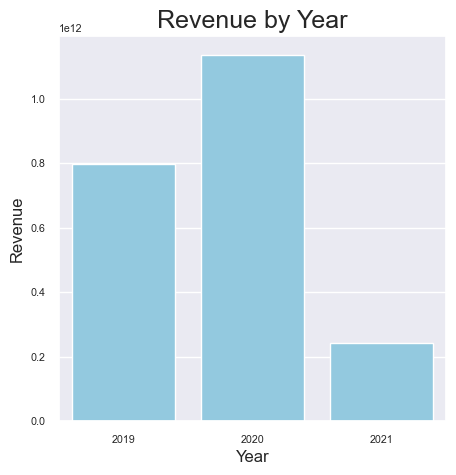

In [39]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set(font_scale = 0.7)
sns.barplot(x='Year',
            y="YearRevenue", 
            data=YearRevenue, 
            color = 'skyblue')
plt.xticks(rotation=0)
plt.title("Revenue by Year", fontsize=18)
plt.xlabel('Year',fontsize=12) 
plt.ylabel('Revenue',fontsize=12)
plt.show()

In [40]:
MonthlyRevenue = TLGdataframe.groupby(['Period'])\
.agg(MonthlyRevenue = ('Revenue', sum)).reset_index()

C:\Users\Jenn\AppData\Local\Temp\ipykernel_20652\2722907732.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  MonthlyRevenue = TLGdataframe.groupby(['Period'])\


In [41]:
MonthlyRevenue.sort_values('Period')

,Period,MonthlyRevenue
0,1.2020,6.291771e+10
1,1.2021,8.508887e+10
2,2.2020,7.154573e+10
3,2.2021,5.311576e+10
4,3.2020,1.355109e+11
5,3.2021,1.031427e+11
6,4.2019,5.384941e+10
7,4.2020,7.068263e+10
8,5.2019,6.829786e+10
9,5.2020,9.294402e+10


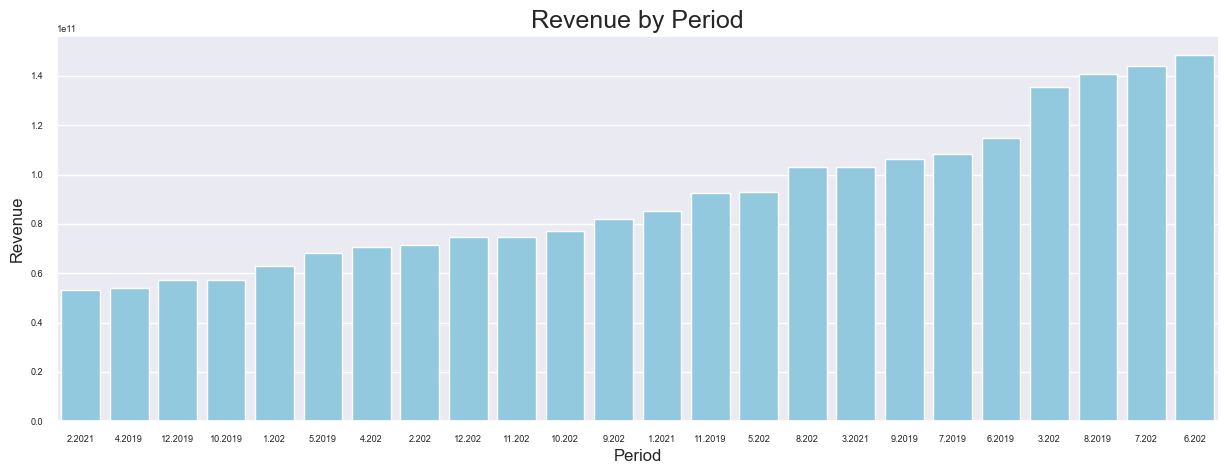

In [52]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale = 0.6)
sns.barplot(x='Period',
            y="MonthlyRevenue", 
            data=MonthlyRevenue, 
            order=MonthlyRevenue.sort_values('MonthlyRevenue').Period, color = 'skyblue')
plt.xticks(rotation=0)
plt.title("Revenue by Period", fontsize=18)
plt.xlabel('Period',fontsize=12) 
plt.ylabel('Revenue',fontsize=12)
plt.show()

In [53]:
MonthlyProfit = TLGdataframe.groupby(['Period'])\
.agg(MonthlyProfit = ('Profit', sum)).reset_index()

C:\Users\Jenn\AppData\Local\Temp\ipykernel_20652\2262717678.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  MonthlyProfit = TLGdataframe.groupby(['Period'])\


In [54]:
MonthlyProfit.sort_values('MonthlyProfit')

,Period,MonthlyProfit
3,2.2021,4.562300e+09
6,4.2019,4.612101e+09
21,11.2020,4.641034e+09
18,10.2019,4.926086e+09
22,12.2019,4.933902e+09
7,4.2020,5.149715e+09
2,2.2020,5.396426e+09
23,12.2020,5.430625e+09
0,1.2020,5.463040e+09
19,10.2020,5.845882e+09


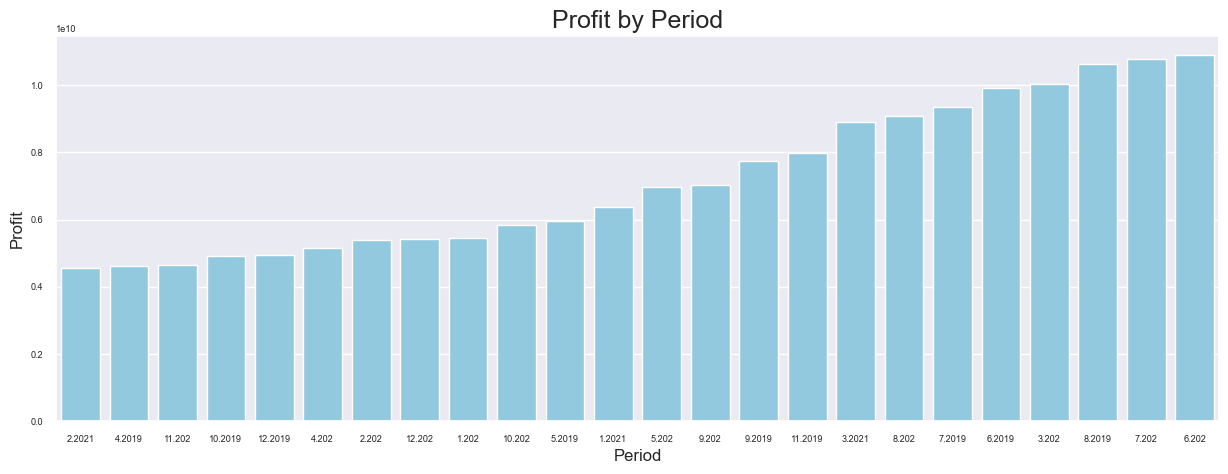

In [56]:
sns.barplot(x='Period',
            y="MonthlyProfit", 
            data=MonthlyProfit, 
            order=MonthlyProfit.sort_values('MonthlyProfit').Period, color = 'skyblue')
plt.xticks(rotation=0)
plt.title("Profit by Period", fontsize=18)
plt.xlabel('Period',fontsize=12) 
plt.ylabel('Profit',fontsize=12)
plt.show()

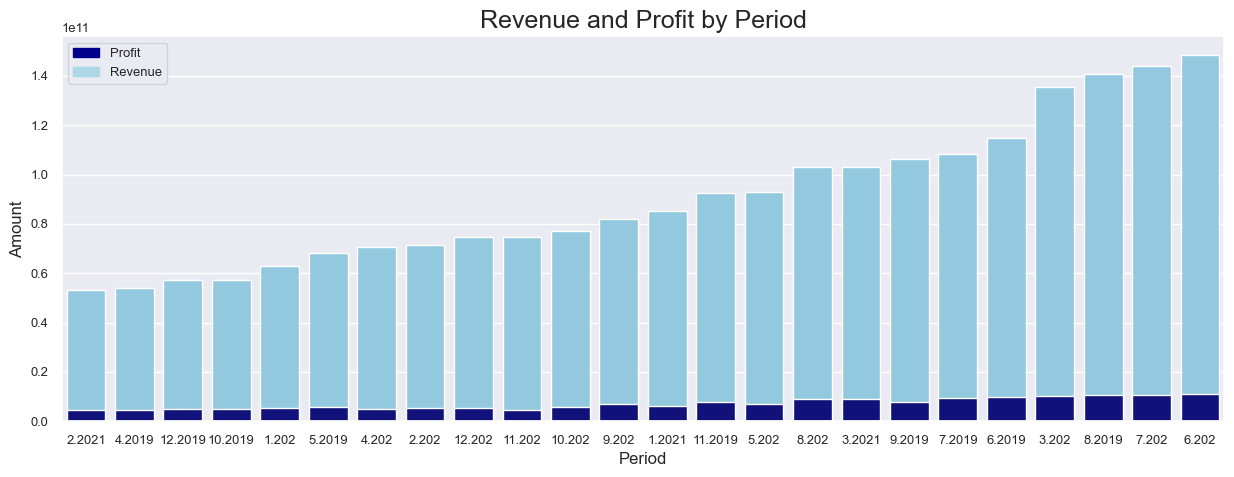

In [58]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale = 0.85)
sns.barplot(x='Period',
            y="MonthlyRevenue", 
            data=MonthlyRevenue, 
            order=MonthlyRevenue.sort_values('MonthlyRevenue').Period, color = 'skyblue')
sns.barplot(x='Period',
            y="MonthlyProfit", 
            data=MonthlyProfit, 
            order=MonthlyProfit.sort_values('MonthlyProfit').Period, color = 'darkblue')
plt.xticks(rotation=0)
plt.title("Revenue and Profit by Period", fontsize=18)
plt.xlabel('Period',fontsize=12) 
plt.ylabel('Amount',fontsize=12)
import matplotlib.patches as mpatches
top_bar = mpatches.Patch(color='darkblue', label='Profit')
bottom_bar = mpatches.Patch(color='lightblue', label='Revenue')
plt.legend(handles=[top_bar, bottom_bar])
plt.show()

In [59]:
RevenueProfit = pd.merge(MonthlyProfit,MonthlyRevenue)
RevenueProfit['MonthlyPercentageProfit'] = RevenueProfit['MonthlyProfit']/ RevenueProfit['MonthlyRevenue']*100 
RevenueProfit

,Period,MonthlyProfit,MonthlyRevenue,MonthlyPercentageProfit
0,1.2020,5.463040e+09,6.291771e+10,8.682833
1,1.2021,6.359192e+09,8.508887e+10,7.473588
2,2.2020,5.396426e+09,7.154573e+10,7.542625
3,2.2021,4.562300e+09,5.311576e+10,8.589353
4,3.2020,1.004341e+10,1.355109e+11,7.411519
5,3.2021,8.911177e+09,1.031427e+11,8.639658
6,4.2019,4.612101e+09,5.384941e+10,8.564813
7,4.2020,5.149715e+09,7.068263e+10,7.285686
8,5.2019,5.942674e+09,6.829786e+10,8.701113
9,5.2020,6.961442e+09,9.294402e+10,7.489930


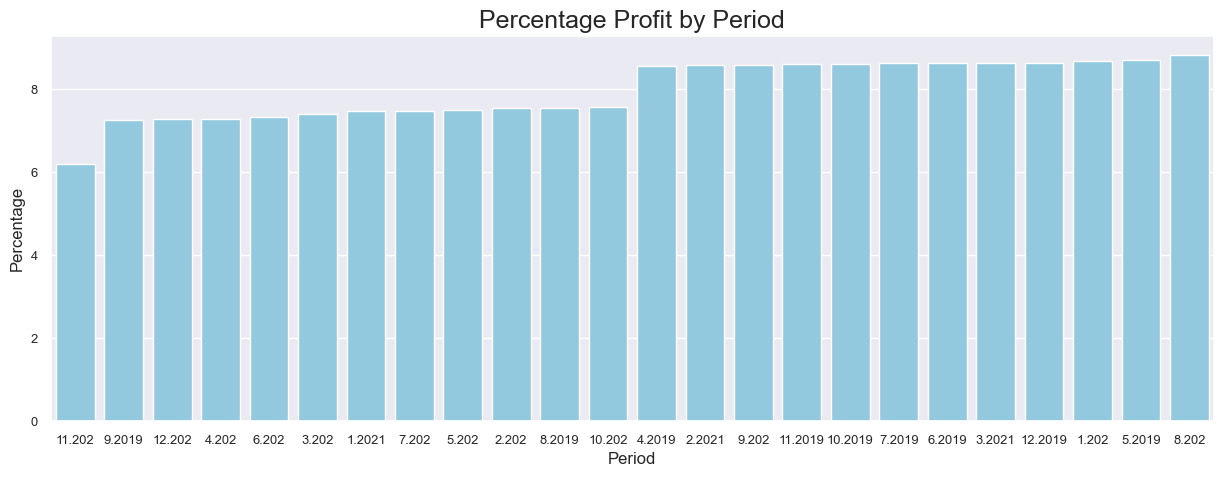

In [ ]:
sns.barplot(x='Period',
            y="MonthlyPercentageProfit", 
            data=RevenueProfit, 
            order=RevenueProfit.sort_values('MonthlyPercentageProfit').Period, color = 'skyblue')
plt.title("Percentage Profit by Period", fontsize=18)
plt.xlabel('Period',fontsize=12) 
plt.ylabel('Percentage',fontsize=12)
plt.show()

This bar chart represents the percentage profit for each period. Firstly, it shows a bimodal distribution with two distict groups of period (with the exception of Nov 2020), with peaks around 7.5% and 8.7% representing months with lower efficiency in generating profits and those with higher efficiency. Closer investigation reveals that the smaller percentage profit group includes almost every month of 2020, potentially indicating the effects of COVID-19 on Thien Long Group - something that was not apparent from just investigating the Revenue and the Profit alone. 
Therefore, while TLG generated relatively consistent revenue throughout this period, the pandemic's operational challenges and increased costs likely impact profit margins. 


# 4. Product Group Profitability Analysis

In [74]:
[TLGdataframe['PercentageProfit'].min(), TLGdataframe['PercentageProfit'].max()]

[-3.0478111127116696, 18.66411841728478]

In [67]:
TLGdataframe['PercentageProfit'].max() - TLGdataframe['PercentageProfit'].min()

21.71192952999645

In [68]:
TLGdataframe['PercentageProfit'].mean()

5.511221352691493

In [69]:
TLGdataframe['PercentageProfit'].median()

4.2472189892385614

In [70]:
TLGdataframe['Profit_Loss'].value_counts()

Profit_Loss
Profit    79517
Loss      11171
Name: count, dtype: int64

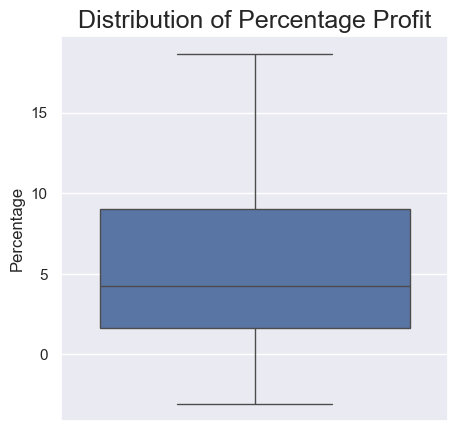

In [71]:
sns.set(rc={'figure.figsize':(5,5)})
PercentageProfitPlot = sns.boxplot(y="PercentageProfit", data=TLGdataframe)
PercentageProfitPlot.set_ylabel("Percentage", fontsize=12)
PercentageProfitPlot.axes.set_title("Distribution of Percentage Profit", fontsize=18)
plt.show()

The box plot illustrates the percentage profit generated by each product launch. The distribution is right-skewed, with a center focus around 4% to 5%, and a median percentage profit of 4.25%. This suggests that, on average, Thien Long Group can anticipate a profit margin of around 4% to 5% for each new product launch. Out of 90,715 product lanches, 87.7% were profitable, indicating that the company achieves a positive return on nearly every product it sells. 

The percentage profit during this period peaked at 18.7% and reached the lowest of -3.05%. This relatively narrow range reflects the sustainability and consistency of Thien Long Group's product performance. Additionally, the absence of significant outliers in the distribution suggests that the company is unlikely to experience extreme profit fluctuations, positive or negative, when launching new products. This consistency highlights the stability of Thien Long Group's business model. 

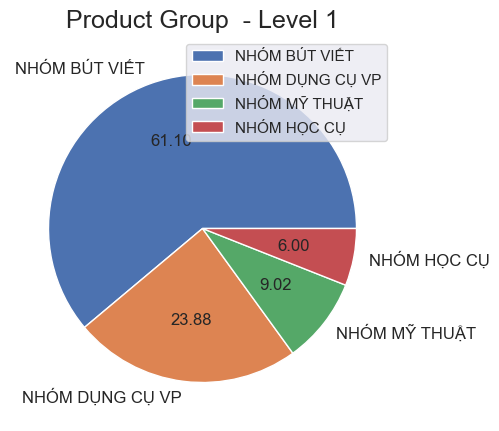

In [79]:
sns.set(rc={'figure.figsize':(5,5)})
a = TLGdataframe['Product Group Name - Level 1'].value_counts()
a.plot(kind = 'pie', autopct='%.2f',textprops={'fontsize': 12})
plt.title("Product Group - Level 1", fontsize=18)
plt.ylabel('')
plt.legend()
plt.show()

The pie chart illustrates the launch proportions of Thien Long Group’s four main product lines: pens, school supplies, art supplies and office tools. The most in-demand products of Thien Long are pens (61.10%) and office tools (23.88%), which together accounted for more than 3/4 of the company’s products. School and art supplies were produced in smaller amounts, accounting for the remaining 15% of TLG products in the market. 


In [81]:
Group1Revenue = TLGdataframe.groupby(['Product Group Name - Level 1'])\
.agg(Group1Revenue = ('Revenue', sum)).reset_index()

C:\Users\Jenn\AppData\Local\Temp\ipykernel_20652\2455813782.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  Group1Revenue = TLGdataframe.groupby(['Product Group Name - Level 1'])\


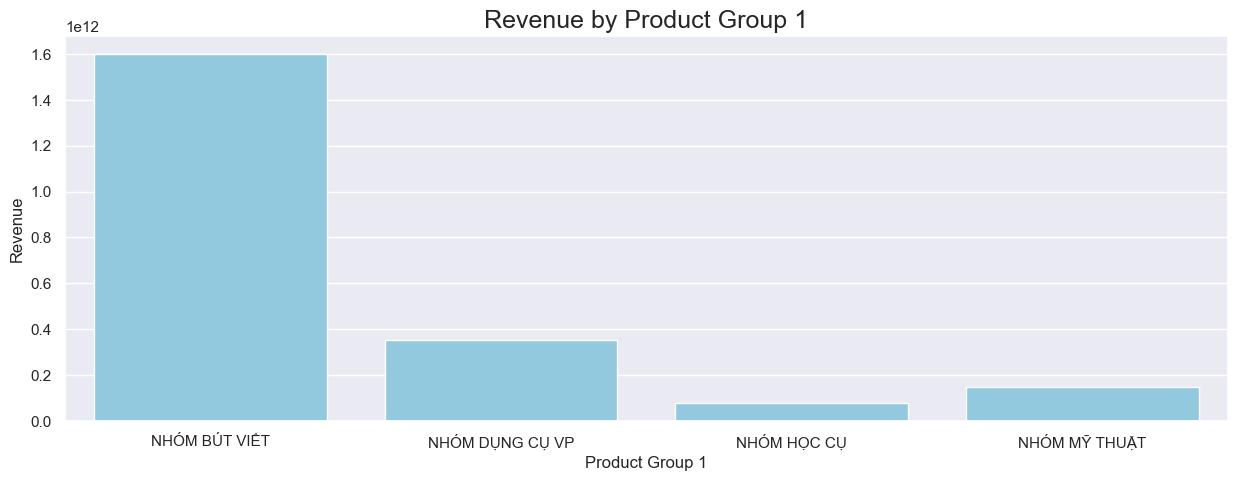

In [84]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='Product Group Name - Level 1',
            y="Group1Revenue", 
            data=Group1Revenue, 
            color = 'skyblue')
plt.xticks(rotation=0)
plt.title("Revenue by Product Group 1", fontsize=18)
plt.xlabel('Product Group 1', fontsize=12) 
plt.ylabel('Revenue',fontsize=12)
plt.show()

Thien Long's main customers are those with high recording and writing needs, particularly students and office workers, who typically operate within a moderate budget. With over 23 million students nationwide, this market represents significant potential for growth, reinforcing the enduring demand for pens.

Pens have been TLG's most established product since the company's launch in 1981, making the brand a household name in Vietnam. Over the years, pens have consistently generated the highest revenue for the company. However, TLG has expanded its focus beyond pens to diversify its product offerings, particularly into office supplies. This segment has been a key area of growth, supported by a Business-to-Business (B2B) strategy aimed at enhacing its compound annual growth rate (CAGR). Accordng to reports from CTCP Chứng khoán Bản Việt (VCSC), despite the current revenue gap between pens and office supplies, the latter is projected to become Thien Long's primary revenue driver in the future, with the potential to surpass pens as the dominant product segment. 

Although school and art supplies currently contribute a smaller share of the company's revenue, they still present significant growth opportunities. TLG's sub-brand, Colokit, specializing in art supplies, is positioned as the company’s export brand. Colokit has achieved notable success in penetrating highly competitive international markets, including China, the United States, and Germany. Thien Long Group's long-term vision is to establish itself as a leading corporation in the Southeast Asian stationery market. While the company faces substantial competition in this space, its track record and strategic positioning suggest that this ambition is achievable.


In [85]:
Group1Profit = TLGdataframe.groupby(['Product Group Name - Level 1'])\
.agg(Group1Profit = ('Profit', sum)).reset_index()

C:\Users\Jenn\AppData\Local\Temp\ipykernel_20652\3781876508.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  Group1Profit = TLGdataframe.groupby(['Product Group Name - Level 1'])\


In [86]:
Group1Profit

,Product Group Name - Level 1,Group1Profit
0,NHÓM BÚT VIẾT,1.278677e+11
1,NHÓM DỤNG CỤ VP,2.652274e+10
2,NHÓM HỌC CỤ,6.145833e+09
3,NHÓM MỸ THUẬT,1.203441e+10


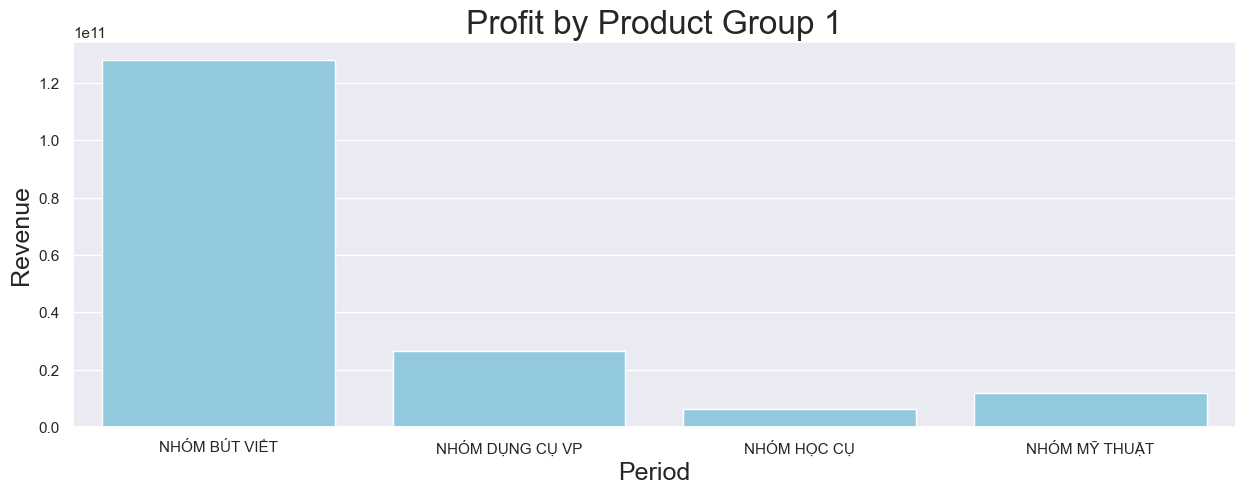

In [87]:
sns.barplot(x='Product Group Name - Level 1',
            y="Group1Profit", 
            data=Group1Profit, 
            color = 'skyblue')
plt.xticks(rotation=0)
plt.title("Profit by Product Group 1", fontsize=24)
plt.xlabel('Period',fontsize=18) 
plt.ylabel('Revenue',fontsize=18)
plt.show()

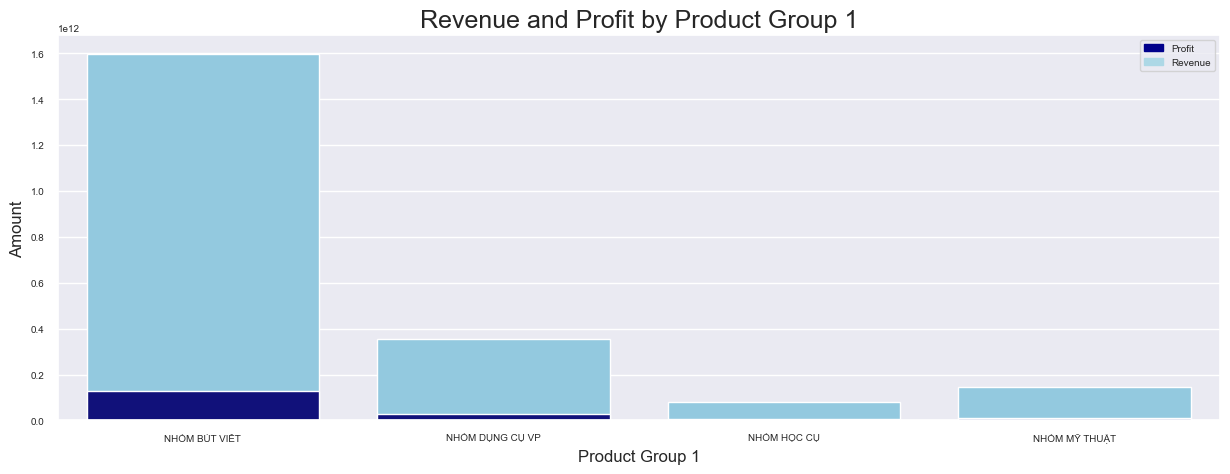

In [229]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale = 0.65)
sns.barplot(x='Product Group Name - Level 1',
            y="Group1Revenue", 
            data=Group1Revenue, 
            color = 'skyblue')
sns.barplot(x='Product Group Name - Level 1',
            y="Group1Profit", 
            data=Group1Profit, 
            color = 'darkblue')
plt.xticks(rotation=0)
plt.title("Revenue and Profit by Product Group 1", fontsize=18)
plt.xlabel('Product Group 1',fontsize=12) 
plt.ylabel('Amount',fontsize=12)
import matplotlib.patches as mpatches
top_bar = mpatches.Patch(color='darkblue', label='Profit')
bottom_bar = mpatches.Patch(color='lightblue', label='Revenue')
plt.legend(handles=[top_bar, bottom_bar])
plt.show()

In [102]:
Group1PercentageProfit = TLGdataframe.groupby(['Product Group Name - Level 1'])\
.agg(Group1PercentageProfit = ('PercentageProfit', 'mean')).reset_index()

In [103]:
Group1PercentageProfit

,Product Group Name - Level 1,Group1PercentageProfit
0,NHÓM BÚT VIẾT,5.518971
1,NHÓM DỤNG CỤ VP,5.419008
2,NHÓM HỌC CỤ,5.839457
3,NHÓM MỸ THUẬT,5.484585


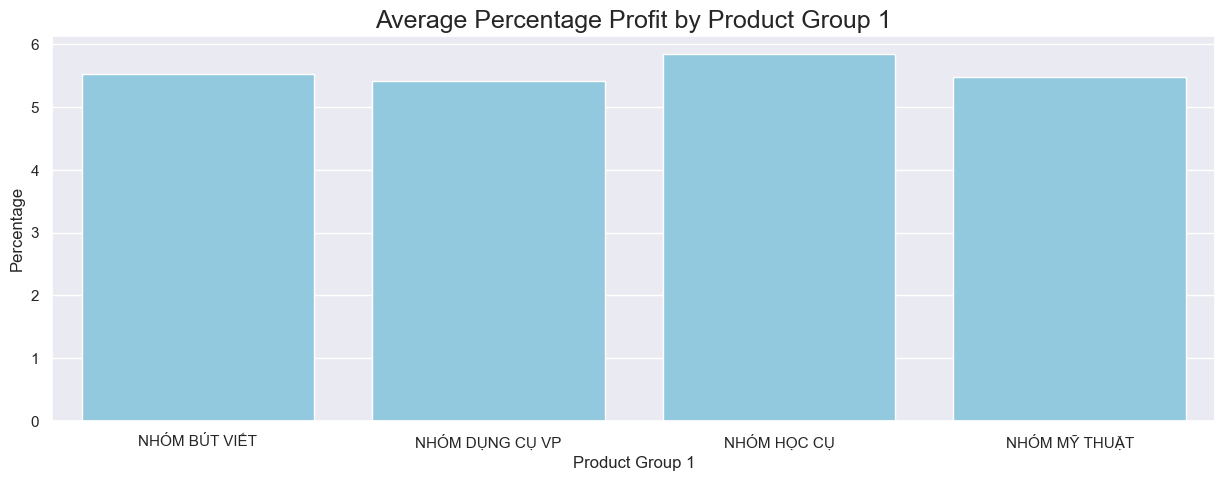

In [107]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='Product Group Name - Level 1',
            y="Group1PercentageProfit", 
            data=Group1PercentageProfit, 
            color = 'skyblue')
plt.xticks(rotation=0)
plt.title("Average Percentage Profit by Product Group 1", fontsize=18)
plt.xlabel('Product Group 1',fontsize=12) 
plt.ylabel('Percentage',fontsize=12)
plt.show()

The profit distribution across Thien Long Group's four main product lines closely mirrors the company's revenue structure. Pens and office supplies continue to be the primary contributors to both revenue and profit, followed by school supplies and art supplies. 

Additionally, TLG's strategic focus on Research & Development has allowed the company to gain a deep understanding of its customers and market dynamics. This approach has also enabled Thien Long to minimize its reliance on international suppliers by internally producing essential materials, such as ink and pen tips. By manufacturing key components in-house, the company has significantly reduced production costs, thereby increasing profit margins and operational efficiency. 


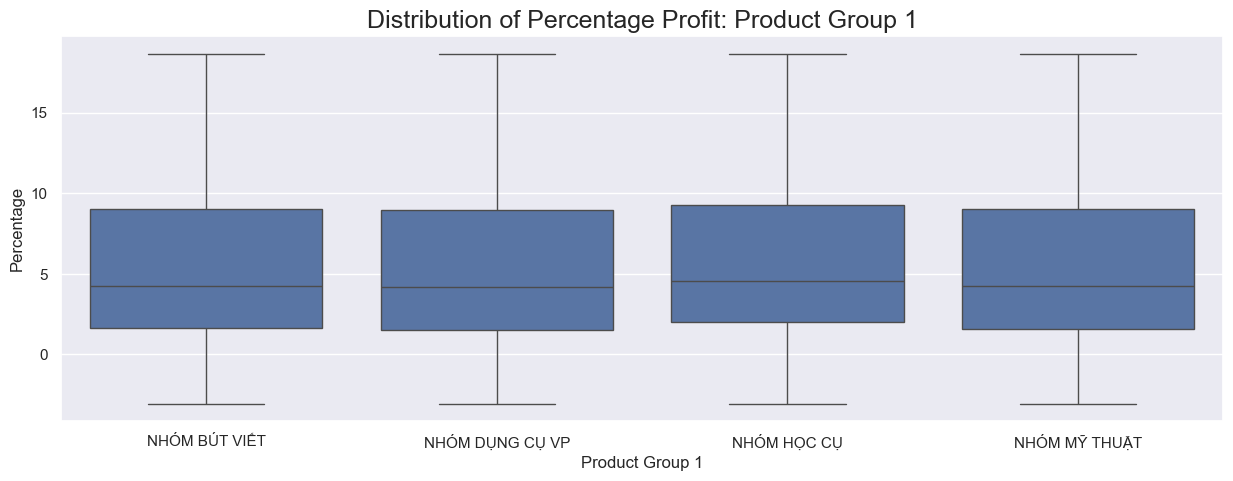

In [109]:
sns.set(rc={'figure.figsize':(15,5)})
Group1BoxPlot = sns.boxplot(x="Product Group Name - Level 1", y="PercentageProfit", data=TLGdataframe)
Group1BoxPlot.set_xlabel("Product Group 1", fontsize=12)
Group1BoxPlot.set_ylabel("Percentage", fontsize=12)
Group1BoxPlot.axes.set_title("Distribution of Percentage Profit: Product Group 1", fontsize=18)
plt.show()

The two plots displayed above, which show the average percentage profit for each product in the first group and a boxplot illustrating the distribution of these percentages, initially suggest minimal variation among the groups. The average percentage profit for all product categories falls within the range of 5% to 6%, and the boxplots exhibit similar characteristics, with a slight right skew in their distribution. 

To further investigate, a one-way ANOVA is conducted to compare the mean percentage profits across the four product groups. The null hypotheis posits that there is no significant difference in the mean percentage profit among the product groups, while the alternative hypothesis suggested that such a difference exists. 

In [110]:
TLGdataframe['Product Group Name - Level 1'].value_counts()

Product Group Name - Level 1
NHÓM BÚT VIẾT      55412
NHÓM DỤNG CỤ VP    21653
NHÓM MỸ THUẬT       8184
NHÓM HỌC CỤ         5439
Name: count, dtype: int64

In [111]:
TLGdataframe = TLGdataframe.dropna()

In [113]:
TLGdataframe.rename(columns={'Product Group Name - Level 1':'ProductGroupNameLevel1'}, inplace=True)
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('PercentageProfit ~ ProductGroupNameLevel1', data=TLGdataframe).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
ProductGroupNameLevel1,7.792482e+02,3.0,10.287789,9.105009e-07
Residual,2.289619e+06,90684.0,NaN,NaN


The ANOVA results yielded a p-value of 9.105009e-07, which is significantly lower than the conventional significance level of .05. This provides strong evidence against the null hypothesis, as there is less than a 5% probability that the observed results are due to pure chance. The calculated F-statistic of 10.287789 further supports the conclusion that there are significant differences in the mean percentage profits among the product groups. 

This finding contradicts the initial assumption drawn from the visualizations, where the distributions appeared quite similar. To explore the source of this variation, we conduct a follow-up test within each pair of product groups. Using pairwise comparisons, we examine the null hypothesis that no significant difference exists between the percentage profits of any two random product groups, with the alternative hypothesis being that a significant difference is present. 

In [114]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
mc = MultiComparison(TLGdataframe['PercentageProfit'], TLGdataframe['ProductGroupNameLevel1'])
tukey_result = mc.tukeyhsd(alpha=0.05)

print(tukey_result)
print('Unique Product Group 1: {}'.format(mc.groupsunique))

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2     meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------
  NHÓM BÚT VIẾT NHÓM DỤNG CỤ VP     -0.1 0.0627 -0.2034 0.0035  False
  NHÓM BÚT VIẾT     NHÓM HỌC CỤ   0.3205    0.0  0.1371 0.5039   True
  NHÓM BÚT VIẾT   NHÓM MỸ THUẬT  -0.0344 0.9387 -0.1873 0.1185  False
NHÓM DỤNG CỤ VP     NHÓM HỌC CỤ   0.4204    0.0  0.2247 0.6162   True
NHÓM DỤNG CỤ VP   NHÓM MỸ THUẬT   0.0656  0.746 -0.1019 0.2331  False
    NHÓM HỌC CỤ   NHÓM MỸ THUẬT  -0.3549 0.0003 -0.5807 -0.129   True
---------------------------------------------------------------------
Unique Product Group 1: ['NHÓM BÚT VIẾT' 'NHÓM DỤNG CỤ VP' 'NHÓM HỌC CỤ' 'NHÓM MỸ THUẬT']


Based on the results from size pairwise Tukey HSD tests, three of the comparisons yielded statistically significant differences (p-value less than 0.05). Notably, all of the tests that led to rejecting the null hypothesis involved the `NHÓM HỌC CỤ` (school supplies) product group, which exhibited the highest percentage profit during this period. This suggests that the school supplies product line stands out in terms of profitability. 

For the remaining product groups - `NHÓM BÚT VIẾT` (writing instruments), `NHÓM DỤNG CỤ VP` (office supplies), and `NHÓM MỸ THUẬT` (art supplies)—the results indicate no significant difference in percentage profit, implying that their profitability is statistically similar during the analyzed period. The significant differences identified in school supplies emphasize its stronger performance relative to the other product categories

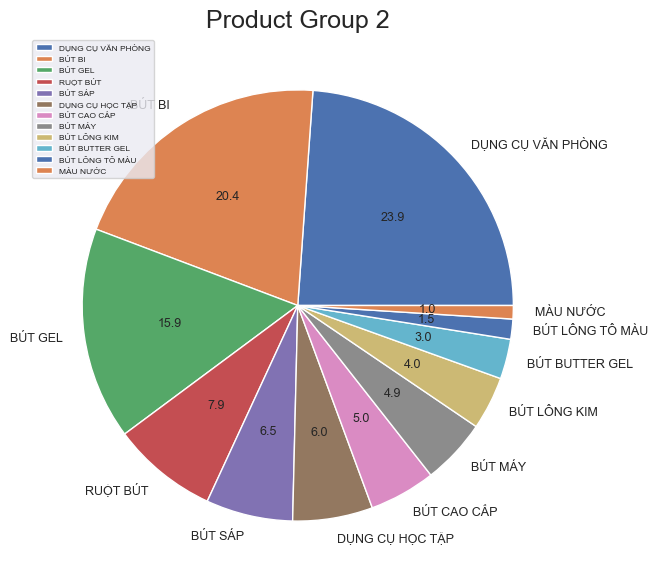

In [132]:
sns.set(rc={'figure.figsize':(7,7)})
Group2Plot = TLGdataframe['Product Group Name - Level 2'].value_counts()
Group2Plot.plot(kind = 'pie', autopct='%.1f',textprops={'fontsize': 9})
plt.title("Product Group 2", fontsize=18)
plt.ylabel('')
plt.legend(loc='upper left', fontsize=6)
plt.show()

In [133]:
Group2Revenue = TLGdataframe.groupby(['Product Group Name - Level 2'])\
.agg(Group2Revenue = ('Revenue', sum)).reset_index()

C:\Users\Jenn\AppData\Local\Temp\ipykernel_20652\1938249272.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  Group2Revenue = TLGdataframe.groupby(['Product Group Name - Level 2'])\


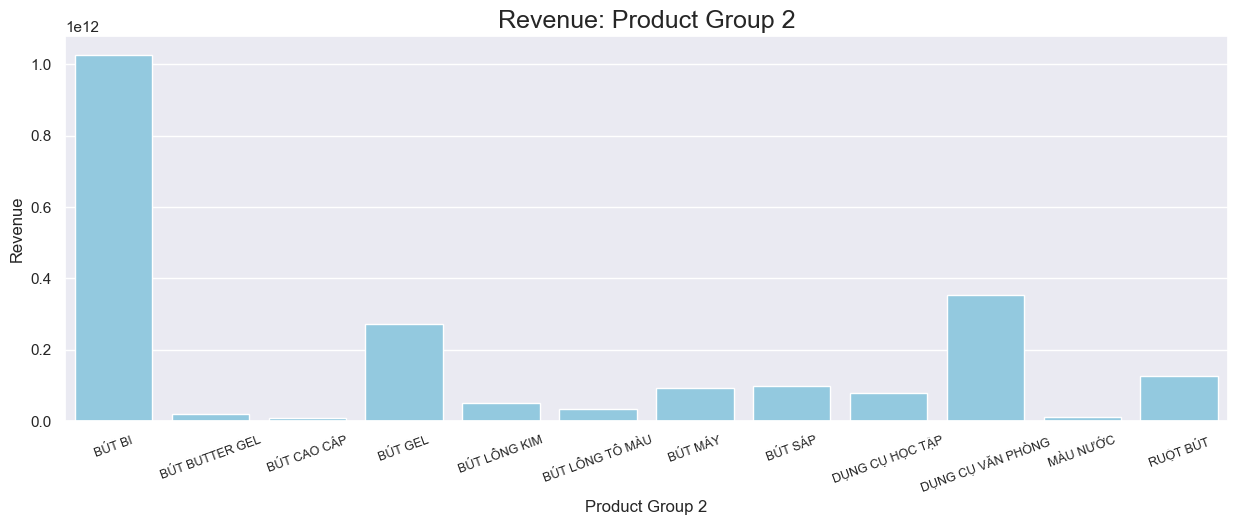

In [140]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale = 1)
sns.barplot(x='Product Group Name - Level 2',
            y="Group2Revenue", 
            data=Group2Revenue, 
            color = 'skyblue')
plt.xticks(rotation=20, fontsize=9)
plt.title("Revenue: Product Group 2", fontsize=18)
plt.xlabel('Product Group 2',fontsize=12) 
plt.ylabel('Revenue',fontsize=12)
plt.show()

In [141]:
Group2Profit = TLGdataframe.groupby(['Product Group Name - Level 2'])\
.agg(Group2Profit = ('Profit', sum)).reset_index()

C:\Users\Jenn\AppData\Local\Temp\ipykernel_20652\2572246794.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  Group2Profit = TLGdataframe.groupby(['Product Group Name - Level 2'])\


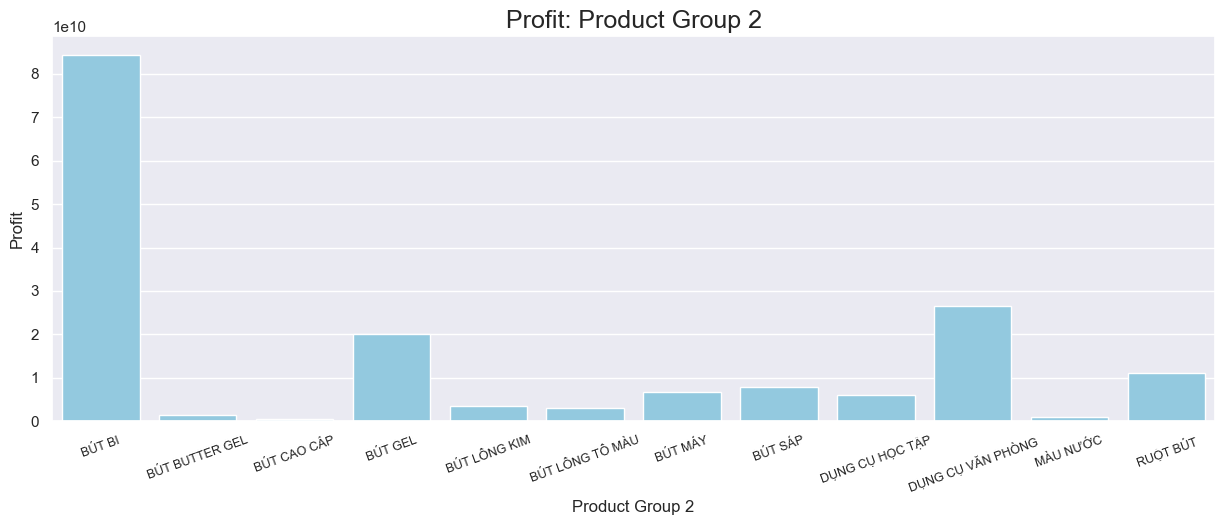

In [144]:
sns.barplot(x='Product Group Name - Level 2',
            y="Group2Profit", 
            data=Group2Profit, 
            color = 'skyblue')
plt.xticks(rotation=20, fontsize=9)
plt.title("Profit: Product Group 2", fontsize=18)
plt.xlabel('Product Group 2',fontsize=12) 
plt.ylabel('Profit',fontsize=12)
plt.show()

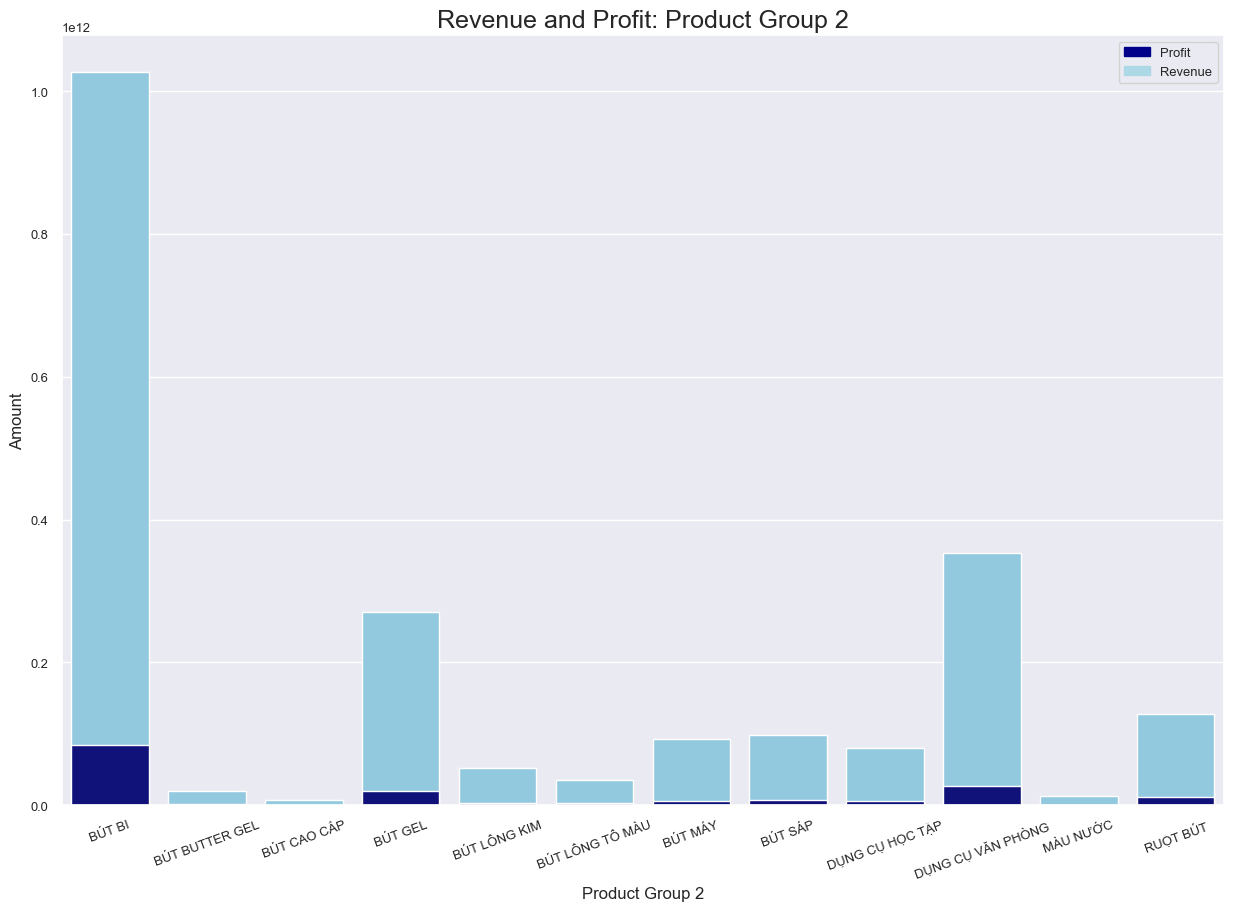

In [149]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale = 0.85)
sns.barplot(x='Product Group Name - Level 2',
            y="Group2Revenue", 
            data=Group2Revenue, 
            color = 'skyblue')
sns.barplot(x='Product Group Name - Level 2',
            y="Group2Profit", 
            data=Group2Profit, 
            color = 'darkblue')
plt.xticks(rotation=20)
plt.title("Revenue and Profit: Product Group 2", fontsize=18)
plt.xlabel('Product Group 2',fontsize=12) 
plt.ylabel('Amount',fontsize=12)
import matplotlib.patches as mpatches
top_bar = mpatches.Patch(color='darkblue', label='Profit')
bottom_bar = mpatches.Patch(color='lightblue', label='Revenue')
plt.legend(handles=[top_bar, bottom_bar])
plt.show()

In [150]:
Group2PercentageProfit = TLGdataframe.groupby(['Product Group Name - Level 2'])\
.agg(Group2PercentageProfit = ('PercentageProfit', 'mean')).reset_index()

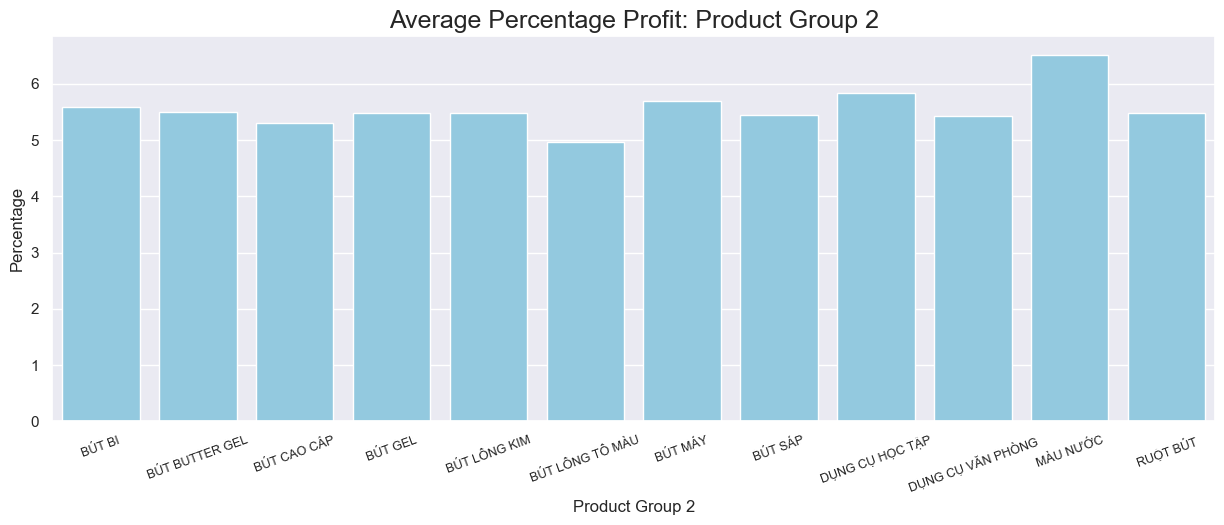

In [152]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='Product Group Name - Level 2',
            y="Group2PercentageProfit", 
            data=Group2PercentageProfit, 
            color = 'skyblue')
plt.xticks(rotation=20, fontsize=9)
plt.title("Average Percentage Profit: Product Group 2", fontsize=18)
plt.xlabel('Product Group 2',fontsize=12) 
plt.ylabel('Percentage',fontsize=12)
plt.show()

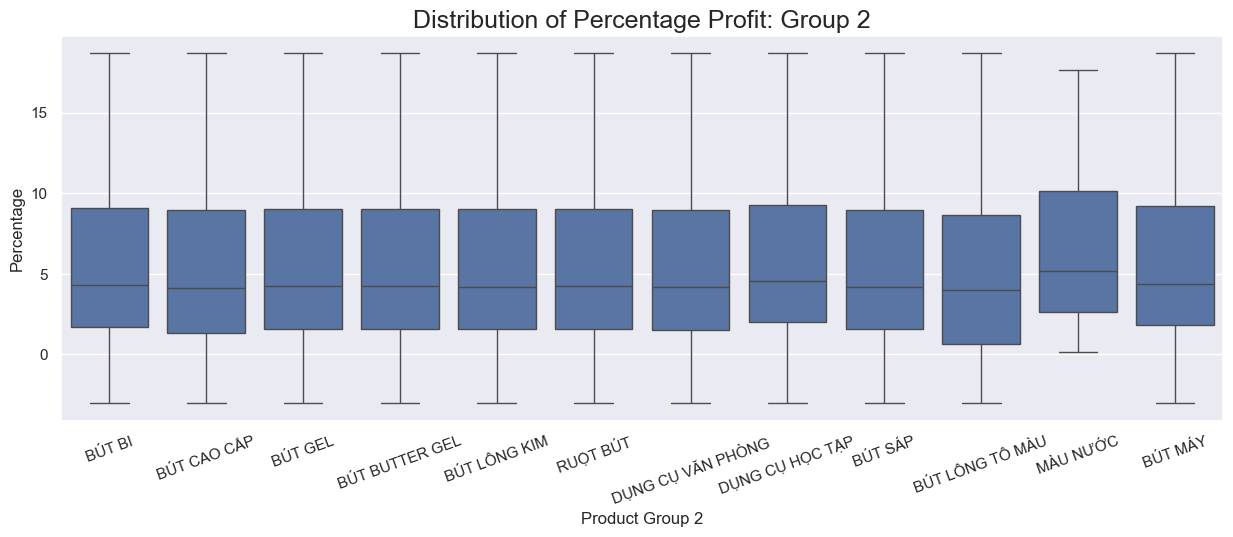

In [157]:
sns.set(rc={'figure.figsize':(15,5)})
Group2BoxPlot = sns.boxplot(x="Product Group Name - Level 2", y="PercentageProfit", data=TLGdataframe)
plt.xticks(rotation=20)
Group2BoxPlot.set_xlabel("Product Group 2", fontsize=12)
Group2BoxPlot.set_ylabel("Percentage", fontsize=12)
Group2BoxPlot.axes.set_title("Distribution of Percentage Profit: Group 2", fontsize=18)
plt.show()

The two plots presented above display the average percentage profit for each product in the second group and the corresponding boxplot illustrating the distribution of these percentages. A slight variation is observed within the group. While most product categories maintain an average percentage profit between 5% and 6%, there are two most notable exceptions: 'BÚT LÔNG TÔ MÀU' falls slightly below 5%, whereas 'MÀU NƯỚC' reaches a peak at 6.5%. The boxplots exhibit a similar pattern with a slightly right-skewed distribution. Notably, 'MÀU NƯỚC' has not experienced any losses during the observed period.

To evaluate the statistical significance of these differences, we conducted a One-Way ANOVA. The null hypothesis assumes no significant difference in the mean percentage profit among the products in the second group, while the alternative hypothesis posits that a significant difference exists.  

In [663]:
TLGdataframe.rename(columns={'Product Group Name - Level 2':'ProductGroupNameLevel2'}, inplace=True)
import statsmodels.api as sm
from statsmodels.formula.api import ols

model1 = ols('PercentageProfit ~ ProductGroupNameLevel2', data=TLGdataframe).fit()
aov_table1 = sm.stats.anova_lm(model1, typ=2)
aov_table1

,sum_sq,df,F,PR(>F)
ProductGroupNameLevel2,2.589055e+03,11.0,9.328699,5.543385e-17
Residual,2.287809e+06,90676.0,NaN,NaN


The p-value of the One-Way ANOVA test is 5.543385e-17, which is significantly lower than the standard significance level of α = 0.05, and even smaller than the p-value observed for Product Group 1. This provides strong evidence against the null hypothesis, indicating that there is less than a 5% probability that the null hypothesis is correct or that the results are due to random chance. Consequently, we reject the null hypothesis. The F-statistic of 9.328699 further reinforces the conclusion that there is a statistically significant difference in the percentage profit among the products in Product Group 2.

This result supports our initial assumption, derived from the visualizations, that the differences in percentage profit among the products in Product Group 2 are indeed statistically significant.

# 5. Distribution Methods Profitability Analysis

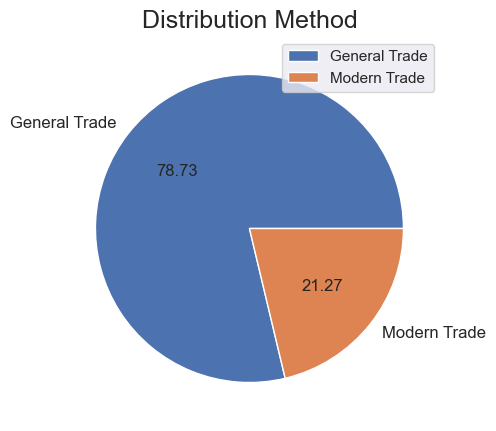

In [164]:
MethodPLot = TLGdataframe['Distribution Method'].value_counts()
sns.set(rc={'figure.figsize':(5,5)})
MethodPLot.plot(kind = 'pie', autopct='%.2f',textprops={'fontsize': 12})
plt.title("Distribution Method", fontsize=18)
plt.ylabel('')
plt.legend(loc='upper right')
plt.show()

The pie chart illustrates the launch proportions of Thien Long Group’s two main distribution methods: General Trade and Modern Trade.

The most common method of Thien Long is General Trade (78.73%), while Modern Trade account only for 21.27% of the distribution method.

In [166]:
MethodRevenue = TLGdataframe.groupby(['Distribution Method'])\
.agg(MethodRevenue = ('Revenue', sum)).reset_index()

C:\Users\Jenn\AppData\Local\Temp\ipykernel_20652\726565198.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  MethodRevenue = TLGdataframe.groupby(['Distribution Method'])\


In [167]:
MethodRevenue['Number of Launching'] =  [71396, 19292]

In [168]:
MethodRevenue['Price'] = MethodRevenue['MethodRevenue']/MethodRevenue['Number of Launching'] 
MethodRevenue

,Distribution Method,MethodRevenue,Number of Launching,Price
0,General Trade,1.520827e+12,71396,2.130129e+07
1,Modern Trade,6.573657e+11,19292,3.407452e+07


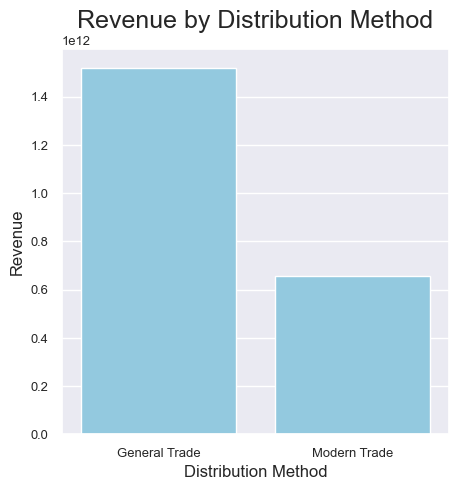

In [170]:
sns.set(font_scale = 1.5)
sns.set(rc={'figure.figsize':(5,5)})
sns.set(font_scale = 0.85)
sns.barplot(x='Distribution Method',
            y="MethodRevenue", 
            data=MethodRevenue, 
            color = 'skyblue')
plt.xticks(rotation=0)
plt.title("Revenue by Distribution Method", fontsize=18)
plt.xlabel('Distribution Method',fontsize=12) 
plt.ylabel('Revenue',fontsize=12)
plt.show()

In [171]:
MethodProfit = TLGdataframe.groupby(['Distribution Method'])\
.agg(MethodProfit = ('Profit', sum)).reset_index()

C:\Users\Jenn\AppData\Local\Temp\ipykernel_20652\1084694259.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  MethodProfit = TLGdataframe.groupby(['Distribution Method'])\


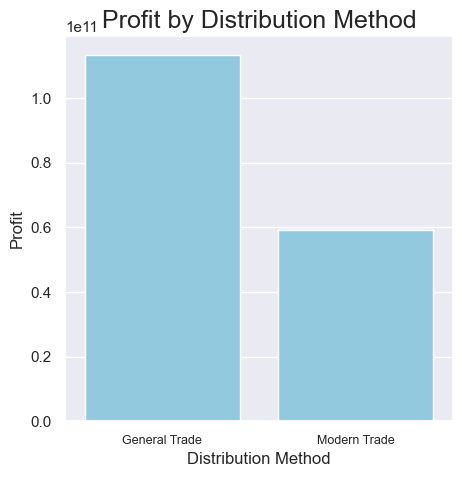

In [177]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set(font_scale = 1)
sns.barplot(x='Distribution Method',
            y="MethodProfit", 
            data=MethodProfit, 
            color = 'skyblue')
plt.xticks(rotation=0, fontsize=9)
plt.title("Profit by Distribution Method", fontsize=18)
plt.xlabel('Distribution Method',fontsize=12) 
plt.ylabel('Profit',fontsize=12)
plt.show()

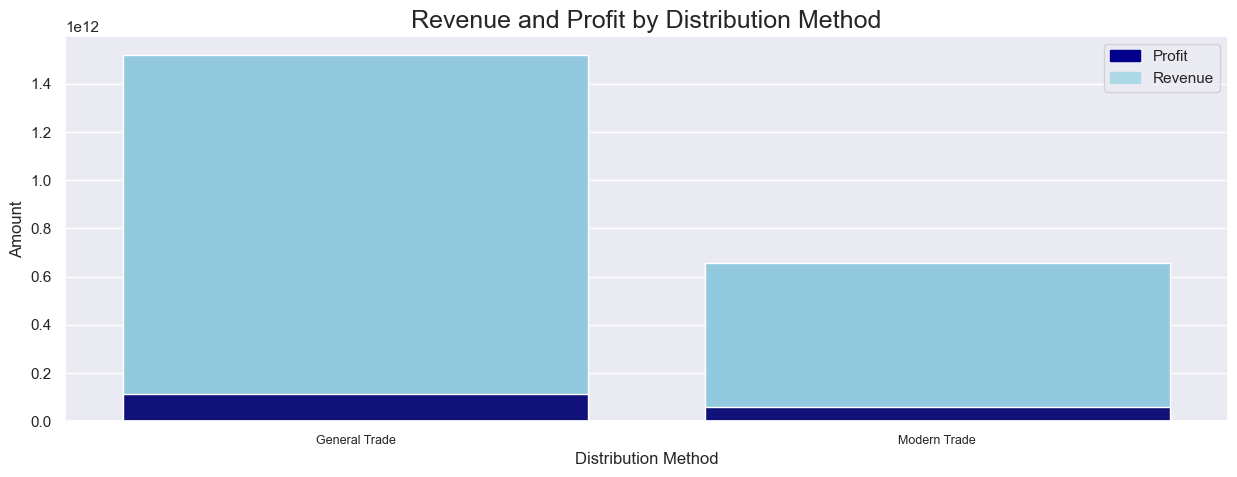

In [181]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale = 1)
sns.barplot(x='Distribution Method',
            y="MethodRevenue", 
            data=MethodRevenue, 
            color = 'skyblue')
sns.barplot(x='Distribution Method',
            y="MethodProfit", 
            data=MethodProfit, 
            color = 'darkblue')
plt.xticks(rotation=0, fontsize=9)
plt.title("Revenue and Profit by Distribution Method", fontsize=18)
plt.xlabel('Distribution Method',fontsize=12) 
plt.ylabel('Amount',fontsize=12)
import matplotlib.patches as mpatches
top_bar = mpatches.Patch(color='darkblue', label='Profit')
bottom_bar = mpatches.Patch(color='lightblue', label='Revenue')
plt.legend(handles=[top_bar, bottom_bar])
plt.show()

In [182]:
MethodPercentageProfit = TLGdataframe.groupby(['Distribution Method'])\
.agg(MethodPercentageProfit = ('PercentageProfit', 'mean')).reset_index()
MethodPercentageProfit

,Distribution Method,MethodPercentageProfit
0,General Trade,5.256040
1,Modern Trade,6.455599


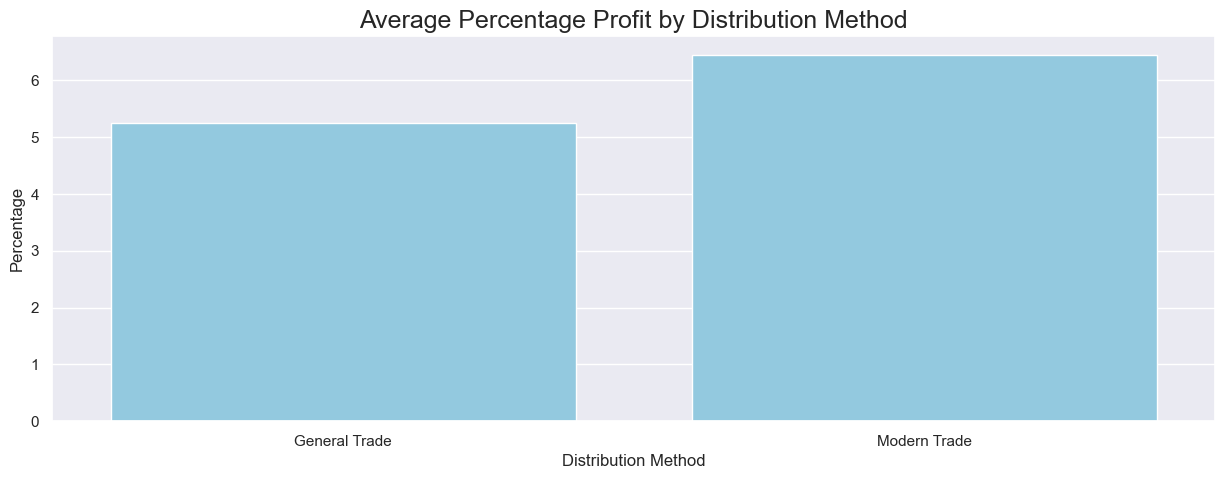

In [183]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale = 1)
sns.barplot(x='Distribution Method',
            y="MethodPercentageProfit", 
            data=MethodPercentageProfit, 
            color = 'skyblue')
plt.xticks(rotation=0)
plt.title("Average Percentage Profit by Distribution Method", fontsize=18)
plt.xlabel('Distribution Method',fontsize=12) 
plt.ylabel('Percentage',fontsize=12)
plt.show()

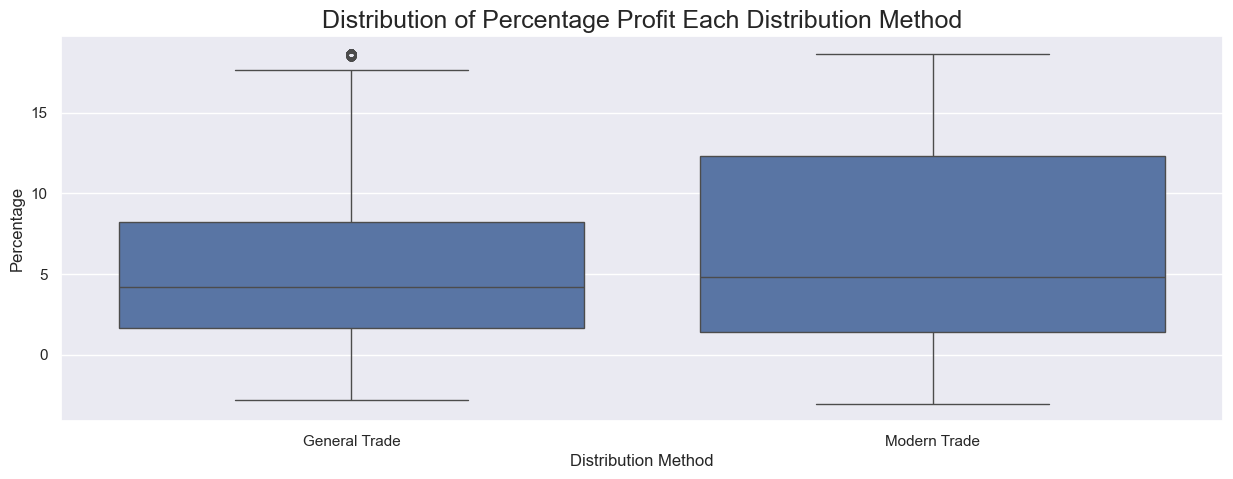

In [184]:
sns.set(rc={'figure.figsize':(15,5)})
MethodBoxPlot = sns.boxplot(x="Distribution Method", y="PercentageProfit", data=TLGdataframe)
MethodBoxPlot.set_xlabel("Distribution Method", fontsize=12)
MethodBoxPlot.set_ylabel("Percentage", fontsize=12)
MethodBoxPlot.axes.set_title("Distribution of Percentage Profit Each Distribution Method", fontsize=18)
plt.show()

The two plots above display the average percentage profit for each distribution group and a corresponding boxplot illustrating the distribution of these percentages. A clear difference is evident between the groups. The General Method has an average percentage profit of 5.256040%, while Modern Trade reaches 6.455599%. Both boxplots exhibit right-skewed distributions, but it is notable that the interquartile range for Modern Trade is larger than that of General Trade, indicating greater variability in percentage profits for Modern Trade.

To test the assumption of a significant difference between these two distribution methods, we conducted a Z-test to compare the means. The null hypothesis posits that there is no significant difference in the mean percentage profit between the two methods, while the alternative hypothesis suggests that a significant difference exists.

In [185]:
General_df = TLGdataframe[TLGdataframe['Distribution Method'] == 'General Trade']
Modern_df = TLGdataframe[TLGdataframe['Distribution Method'] == 'Modern Trade']

In [186]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
stests.ztest(General_df['PercentageProfit'], x2=Modern_df['PercentageProfit'], value=0,alternative='two-sided')

(-29.55756501930371, 5.250065128684307e-192)

The p-value of the test is 5.250065128684307e-192, which is much less than the significance level alpha = 0.05. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis with f statistic is -29.55756501930371 and conclude that there is significant difference in the percentage profit in two distribution method. 

# 6. Sales Region Profitability Analysis

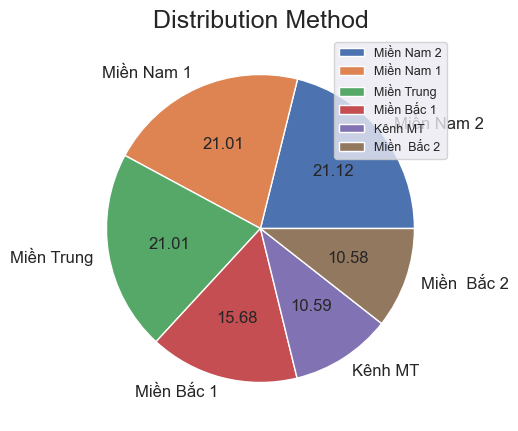

In [189]:
SalePlot = TLGdataframe['Sale Name'].value_counts()
SalePlot.plot(kind = 'pie', autopct='%.2f',textprops={'fontsize': 12})
plt.title("Distribution Method", fontsize=18)
plt.ylabel('')
plt.legend(loc='upper right', fontsize=9)
plt.show()

The pie chart illustrates the launch proportions of Thien Long Group's six primary sales groups: South 1, South 2, North 1, North 2, Central, and Modern Trade.

Together, South 1, South 2, and Central account for more than three-fifths of the company's product launches, each contributing approximately 21% to the total. These groups display a fairly balanced share of the product launches. Following them are North 1 and North 2, which also hold significant proportions. Modern Trade, while comprising a smaller share at just above 10%, plays a crucial role, highlighting its growing importance in the company’s modern sales strategy.

In [190]:
SaleGroupRevenue = TLGdataframe.groupby(['Sale Name'])\
.agg(SaleGroupRevenue = ('Revenue', sum)).reset_index()

C:\Users\Jenn\AppData\Local\Temp\ipykernel_20652\805116132.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  SaleGroupRevenue = TLGdataframe.groupby(['Sale Name'])\


In [191]:
SaleGroupRevenue['Number of Launching'] =  [9606, 9598, 14222, 19054, 19157, 19051]

In [192]:
SaleGroupRevenue['PricePerLauching'] = SaleGroupRevenue['SaleGroupRevenue']/SaleGroupRevenue['Number of Launching'] 
SaleGroupRevenue

,Sale Name,SaleGroupRevenue,Number of Launching,PricePerLauching
0,Kênh MT,1.568858e+11,9606,1.633206e+07
1,Miền Bắc 2,2.107478e+11,9598,2.195747e+07
2,Miền Bắc 1,4.329619e+11,14222,3.044311e+07
3,Miền Nam 1,6.524134e+11,19054,3.424024e+07
4,Miền Nam 2,3.504076e+11,19157,1.829136e+07
5,Miền Trung,3.747762e+11,19051,1.967226e+07


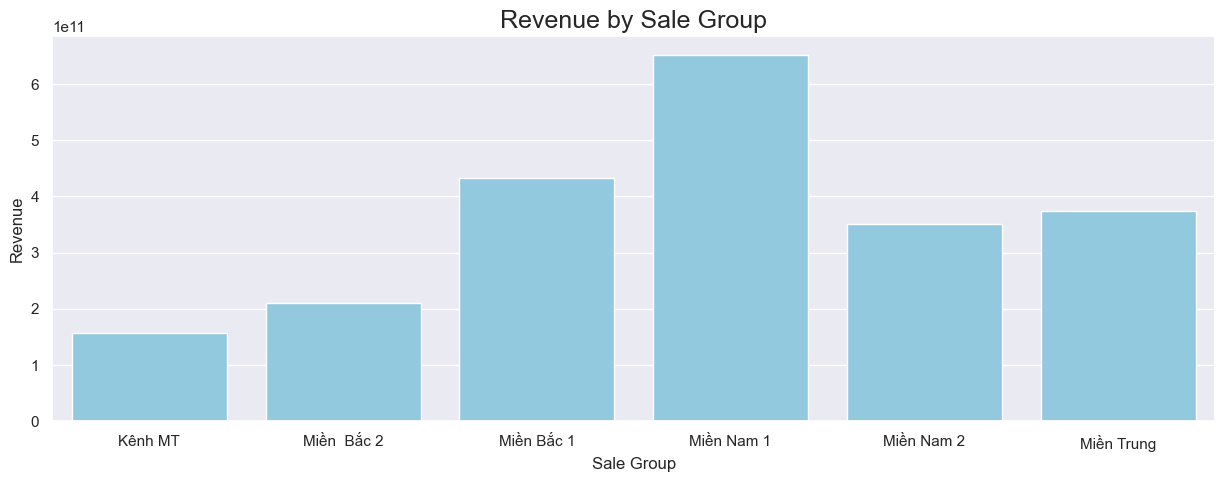

In [195]:
sns.set(font_scale = 1)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='Sale Name',
            y="SaleGroupRevenue", 
            data=SaleGroupRevenue, 
            color = 'skyblue')
plt.xticks(rotation=0)
plt.title("Revenue by Sale Group", fontsize=18)
plt.xlabel('Sale Group',fontsize=12) 
plt.ylabel('Revenue',fontsize=12)
plt.show()

In [196]:
SaleProfit = TLGdataframe.groupby(['Sale Name'])\
.agg(SaleProfit = ('Profit', sum)).reset_index()

C:\Users\Jenn\AppData\Local\Temp\ipykernel_20652\120653743.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  SaleProfit = TLGdataframe.groupby(['Sale Name'])\


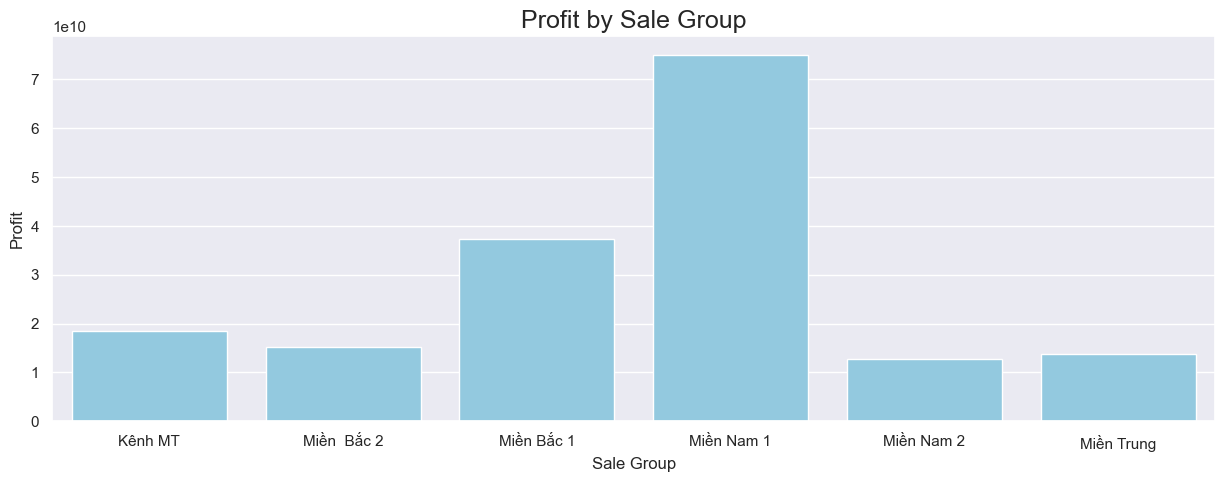

In [198]:
sns.barplot(x='Sale Name',
            y="SaleProfit", 
            data=SaleProfit, 
            color = 'skyblue')
plt.xticks(rotation=0)
plt.title("Profit by Sale Group", fontsize=18)
plt.xlabel('Sale Group',fontsize=12) 
plt.ylabel('Profit',fontsize=12)
plt.show()

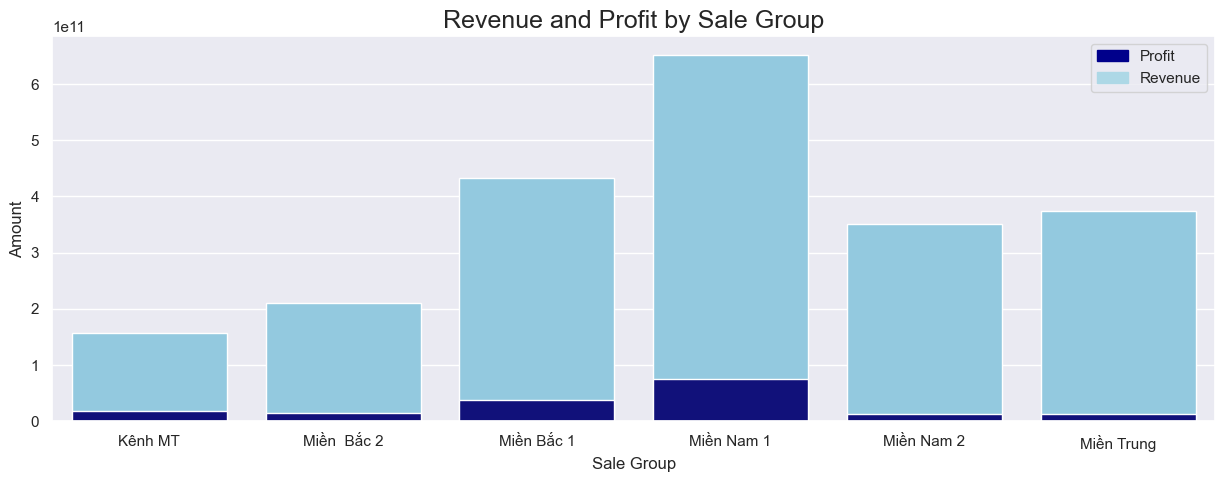

In [200]:
sns.barplot(x='Sale Name',
            y="SaleGroupRevenue", 
            data=SaleGroupRevenue, 
            color = 'skyblue')
sns.barplot(x='Sale Name',
            y="SaleProfit", 
            data=SaleProfit, 
            color = 'darkblue')
plt.xticks(rotation=0)
plt.title("Revenue and Profit by Sale Group", fontsize=18)
plt.xlabel('Sale Group',fontsize=12) 
plt.ylabel('Amount',fontsize=12)
import matplotlib.patches as mpatches
top_bar = mpatches.Patch(color='darkblue', label='Profit')
bottom_bar = mpatches.Patch(color='lightblue', label='Revenue')
plt.legend(handles=[top_bar, bottom_bar])
plt.show()

In [201]:
SalePercentageProfit = TLGdataframe.groupby(['Sale Name'])\
.agg(SalePercentageProfit = ('PercentageProfit', 'mean')).reset_index()
SalePercentageProfit

,Sale Name,SalePercentageProfit
0,Kênh MT,7.112920
1,Miền Bắc 2,6.847763
2,Miền Bắc 1,5.853477
3,Miền Nam 1,8.250133
4,Miền Nam 2,3.135836
5,Miền Trung,3.424004


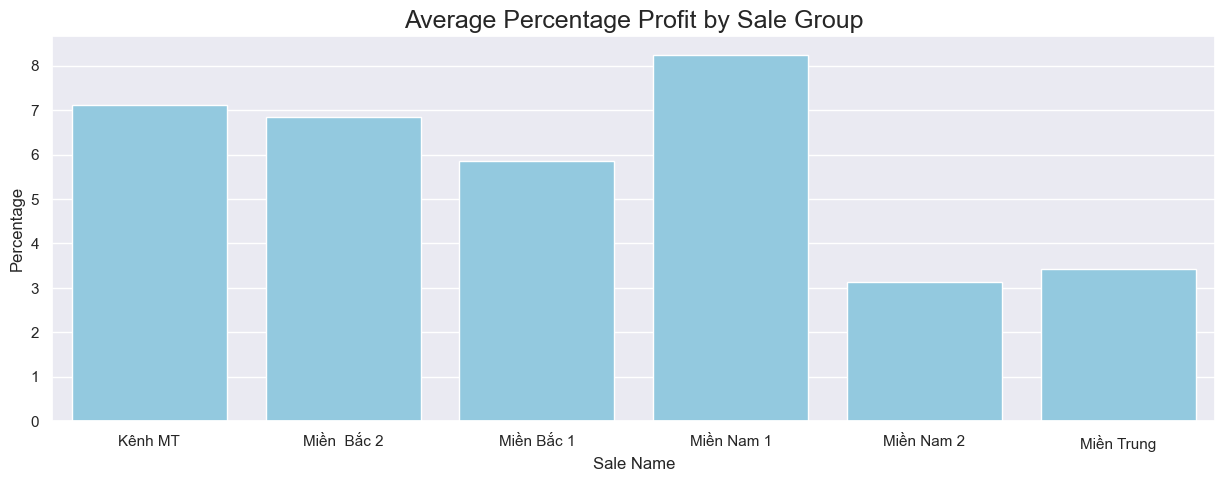

In [203]:
sns.set(font_scale = 1)
sns.barplot(x='Sale Name',
            y="SalePercentageProfit", 
            data=SalePercentageProfit, 
            color = 'skyblue')
plt.xticks(rotation=0)
plt.title("Average Percentage Profit by Sale Group", fontsize=18)
plt.xlabel('Sale Name',fontsize=12) 
plt.ylabel('Percentage',fontsize=12)
plt.show()

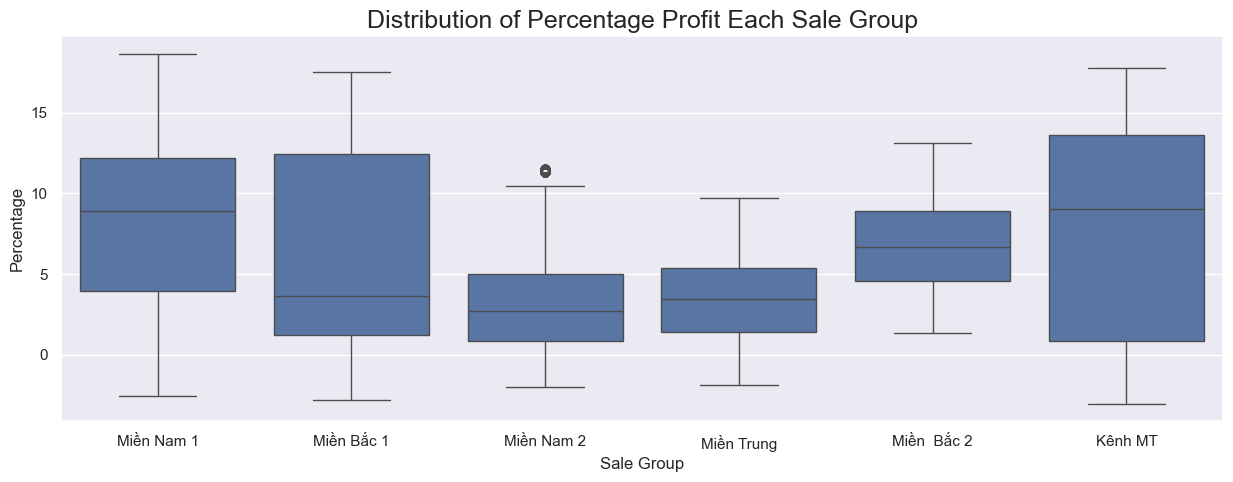

In [205]:
SaleGroupBoxPlot = sns.boxplot(x="Sale Name", y="PercentageProfit", data=TLGdataframe)
SaleGroupBoxPlot.set_xlabel("Sale Group", fontsize=12)
SaleGroupBoxPlot.set_ylabel("Percentage", fontsize=12)
SaleGroupBoxPlot.axes.set_title("Distribution of Percentage Profit Each Sale Group", fontsize=18)
plt.show()

The two plots above display the average percentage profit for each sales group alongside a boxplot representing the distribution of these percentages. A noticeable difference is observed among the sales groups, which may be the key variable contributing to the variation in percentage profit. The boxplot suggests that different sales groups tend to achieve distinct percentage profits, reinforcing the assumption that there may be significant differences in profitability across the groups.

To verify this assumption, we conduct a One-Way ANOVA test to compare the mean percentage profits among the sales groups. The null hypothesis assumes that there is no significant difference in the mean percentage profit across the sales groups, while the alternative hypothesis posits that a significant difference exists.

In [206]:
TLGdataframe.rename(columns={'Sale Name':'SaleName'}, inplace=True)
import statsmodels.api as sm
from statsmodels.formula.api import ols

model2 = ols('PercentageProfit ~ SaleName', data=TLGdataframe).fit()
aov_table2 = sm.stats.anova_lm(model2, typ=2)
aov_table2

,sum_sq,df,F,PR(>F)
SaleName,3.774788e+05,5.0,3578.878974,0.0
Residual,1.912919e+06,90682.0,NaN,NaN


The p-value of the test is very close to 0, which is much less than the significance level alpha = 0.05. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis with f statistic is 3578.878974 and conclude that there is significant difference in the percentage profit among Sale Groups. This supports our assumption with the intial visualization that there is a statistical significant difference in the percentage profit among Sale Groups.

In [207]:
TLGdataframe['Product Name'].value_counts()

Product Name
Bút lông màu FP01 12 màu       456
Sáp màu CRC07 10 màu           455
Sáp màu CRC04/DO 10 màu        455
Sáp dầu OPC05/DO 18 màu        455
Bút lông màu FP02/DO 12 màu    455
                              ... 
Bút TL061 xanh-hộp 20 cây      442
Bút TL08 xanh-hộp 20 cây       442
Hộp quà GS11 đen               427
Bút GEL21 đủ màu-vỉ 10 cây     416
Bút máy FT15 hộp 15 cây        381
Name: count, Length: 201, dtype: int64

# Revenue by Region

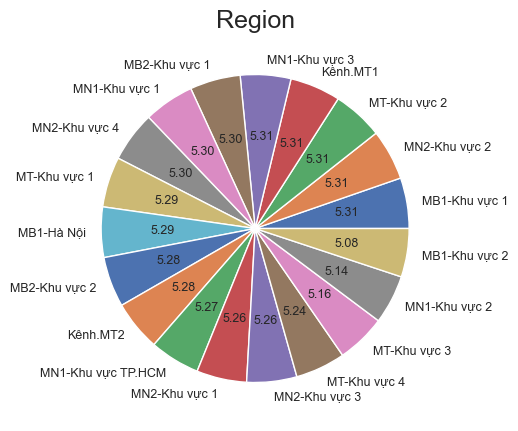

In [210]:
RegionPlot = TLGdataframe['Region Name'].value_counts()
RegionPlot.plot(kind = 'pie', autopct='%.2f',textprops={'fontsize': 9})
plt.title("Region", fontsize=18)
plt.ylabel('')
plt.show()

The pie chart illustrates the launch proportions of Thien Long Group’s main selling regions across the country.

There is minimal variation between the regions, with each accounting for approximately 5.31% of the total product launches. This distribution reflects Thien Long’s strategic approach to targeting customers nationwide. Given that the company’s principal product is pens—a universally needed item—the relatively even distribution highlights Thien Long's efforts to meet demand across all regions, ensuring widespread market coverage.

In [211]:
RegionRevenue = TLGdataframe.groupby(['Region Name'])\
.agg(RegionRevenue = ('Revenue', sum), RegionProduct = ('Number of Product', sum), RegionProfit = ('Profit', sum)).reset_index()

C:\Users\Jenn\AppData\Local\Temp\ipykernel_20652\1193844404.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  RegionRevenue = TLGdataframe.groupby(['Region Name'])\
C:\Users\Jenn\AppData\Local\Temp\ipykernel_20652\1193844404.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  RegionRevenue = TLGdataframe.groupby(['Region Name'])\


In [212]:
RegionRevenue

,Region Name,RegionRevenue,RegionProduct,RegionProfit
0,Kênh.MT1,1.353043e+11,48972282.0,1.830022e+10
1,Kênh.MT2,2.158149e+10,7857756.0,1.584702e+08
2,MB1-Hà Nội,2.443863e+11,87540373.0,3.355480e+10
3,MB1-Khu vực 1,8.617360e+10,31180137.0,2.998068e+09
4,MB1-Khu vực 2,1.024020e+11,37231037.0,7.813163e+08
5,MB2-Khu vực 1,8.887625e+10,32056365.0,4.506647e+09
6,MB2-Khu vực 2,1.218715e+11,43916701.0,1.067306e+10
7,MN1-Khu vực 1,1.220435e+11,44128530.0,1.143653e+10
8,MN1-Khu vực 2,7.177544e+10,25850505.0,5.958563e+09
9,MN1-Khu vực 3,6.850527e+10,24723145.0,6.830201e+08


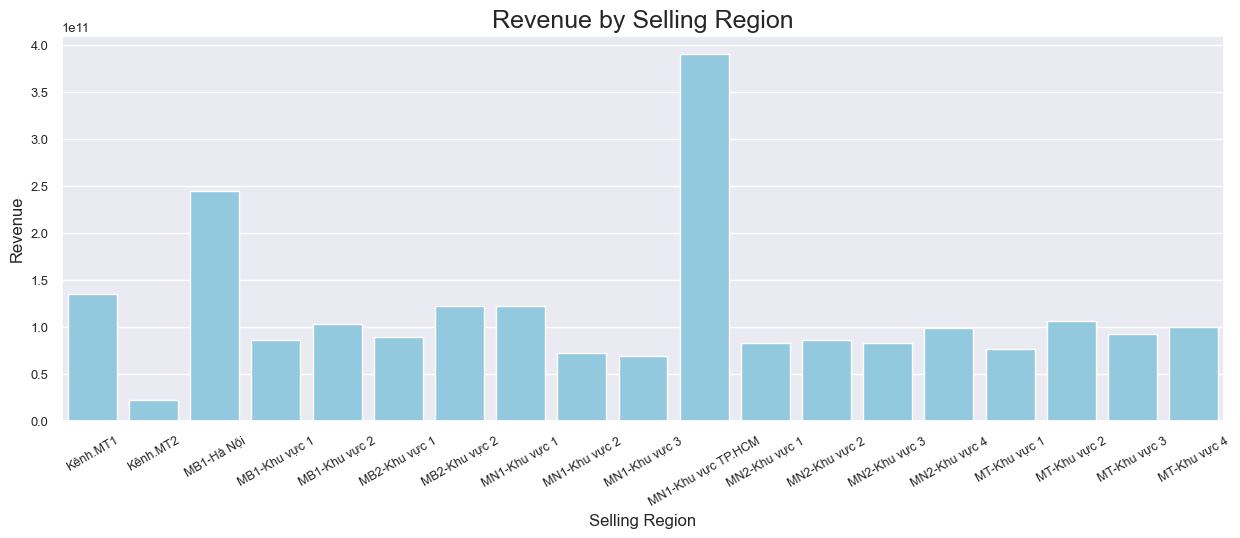

In [218]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale = 0.85)
sns.barplot(x='Region Name',
            y="RegionRevenue", 
            data=RegionRevenue, 
            color = 'skyblue')
plt.xticks(rotation=30, fontsize=9)
plt.title("Revenue by Selling Region", fontsize=18)
plt.xlabel('Selling Region',fontsize=12) 
plt.ylabel('Revenue',fontsize=12)
plt.show()

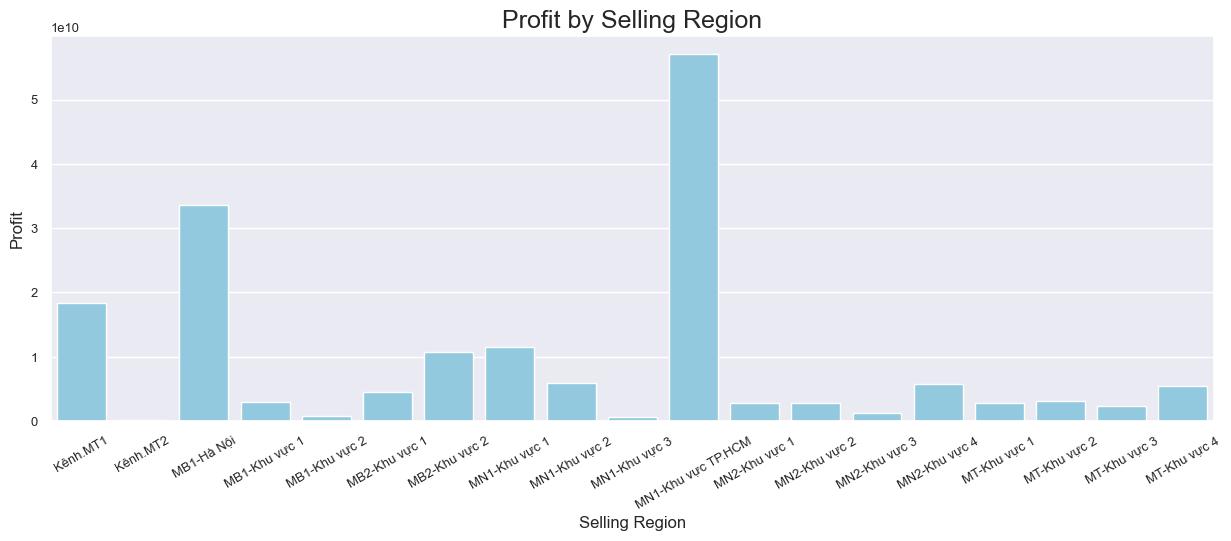

In [216]:
sns.barplot(x='Region Name',
            y="RegionProfit", 
            data=RegionRevenue, 
            color = 'skyblue')
plt.xticks(rotation=30)
plt.title("Profit by Selling Region", fontsize=18)
plt.xlabel('Selling Region',fontsize=12) 
plt.ylabel('Profit',fontsize=12)
plt.show()

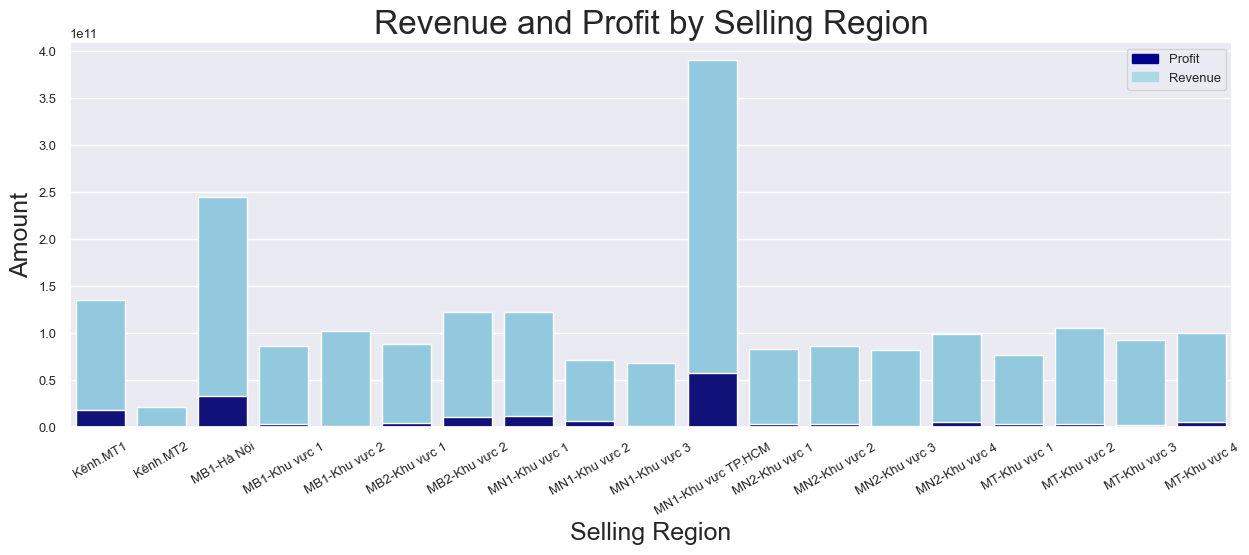

In [219]:
sns.barplot(x='Region Name',
            y="RegionRevenue", 
            data=RegionRevenue, 
            color = 'skyblue')
sns.barplot(x='Region Name',
            y="RegionProfit", 
            data=RegionRevenue, 
            color = 'darkblue')
plt.xticks(rotation=30)
plt.title("Revenue and Profit by Selling Region", fontsize=24)
plt.xlabel('Selling Region',fontsize=18) 
plt.ylabel('Amount',fontsize=18)
import matplotlib.patches as mpatches
top_bar = mpatches.Patch(color='darkblue', label='Profit')
bottom_bar = mpatches.Patch(color='lightblue', label='Revenue')
plt.legend(handles=[top_bar, bottom_bar])
plt.show()

In [220]:
RegionPercentageProfit = TLGdataframe.groupby(['Region Name'])\
.agg(RegionPercentageProfit = ('PercentageProfit', 'mean')).reset_index()
RegionPercentageProfit

,Region Name,RegionPercentageProfit
0,Kênh.MT1,13.533048
1,Kênh.MT2,0.655256
2,MB1-Hà Nội,13.670491
3,MB1-Khu vực 1,3.209815
4,MB1-Khu vực 2,0.489672
5,MB2-Khu vực 1,4.952664
6,MB2-Khu vực 2,8.750777
7,MN1-Khu vực 1,9.318983
8,MN1-Khu vực 2,8.316394
9,MN1-Khu vực 3,0.857767


In [221]:
RegionPercentageProfit.rename(columns={'Region Name':'RegionName'}, inplace=True)
RegionPercentageProfit

,RegionName,RegionPercentageProfit
0,Kênh.MT1,13.533048
1,Kênh.MT2,0.655256
2,MB1-Hà Nội,13.670491
3,MB1-Khu vực 1,3.209815
4,MB1-Khu vực 2,0.489672
5,MB2-Khu vực 1,4.952664
6,MB2-Khu vực 2,8.750777
7,MN1-Khu vực 1,9.318983
8,MN1-Khu vực 2,8.316394
9,MN1-Khu vực 3,0.857767


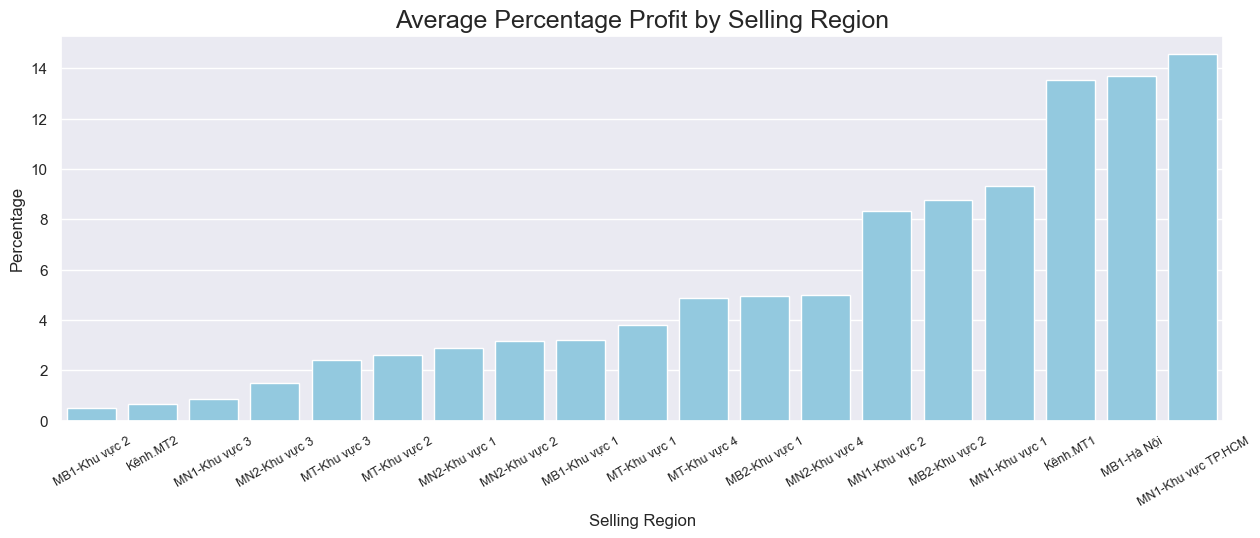

In [224]:

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='RegionName',
            y="RegionPercentageProfit", 
            data=RegionPercentageProfit, 
            order=RegionPercentageProfit.sort_values('RegionPercentageProfit').RegionName,color = 'skyblue')
plt.xticks(rotation=30, fontsize=9)
plt.title("Average Percentage Profit by Selling Region", fontsize=18)
plt.xlabel('Selling Region',fontsize=12) 
plt.ylabel('Percentage',fontsize=12)
plt.show()

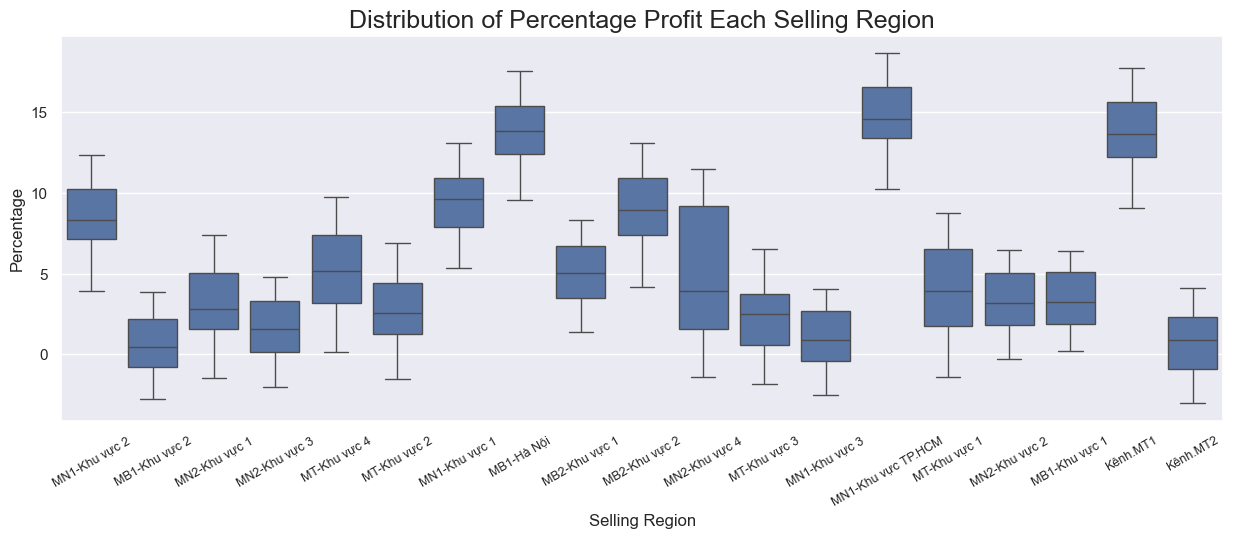

In [227]:
RegionBoxPlot = sns.boxplot(x="Region Name", y="PercentageProfit", data=TLGdataframe)
RegionBoxPlot.set_xlabel("Selling Region", fontsize=12)
RegionBoxPlot.set_ylabel("Percentage", fontsize=12)
RegionBoxPlot.axes.set_title("Distribution of Percentage Profit Each Selling Region", fontsize=18)
plt.xticks(rotation=30, fontsize=9)
plt.show()

The two plots above display the average percentage profit for each selling region and the corresponding boxplot illustrating the distribution of these percentages. A very clear difference is evident among the regions, suggesting that the selling region has now become the key variable contributing the most to the variation in percentage profit, surpassing the effect of the sale group. The boxplot further indicates that different selling regions yield distinct percentage profits, reinforcing the assumption that these variations are significant.

To formally test this assumption, we conducted a One-Way ANOVA test to compare the mean percentage profits across the selling regions. The null hypothesis posits that there is no significant difference in the mean percentage profit among the selling regions, while the alternative hypothesis suggests that a significant difference does exist.

In [228]:
TLGdataframe.rename(columns={'Region Name':'RegionName'}, inplace=True)
import statsmodels.api as sm
from statsmodels.formula.api import ols

model3 = ols('PercentageProfit ~ RegionName', data=TLGdataframe).fit()
aov_table3 = sm.stats.anova_lm(model3, typ=2)
aov_table3

,sum_sq,df,F,PR(>F)
RegionName,1.776882e+06,18.0,17429.751306,0.0
Residual,5.135158e+05,90669.0,NaN,NaN


The p-value of the One-Way ANOVA test is extremely close to 0, which is significantly below the standard significance level of α = 0.05. This provides strong evidence against the null hypothesis, indicating that there is less than a 5% probability that the observed results are due to random chance. Therefore, we reject the null hypothesis. With an F-statistic of 17429.751306, we conclude that there is a statistically significant difference in the percentage profit among the selling regions.

This result aligns with our initial assumption, derived from the visualizations, that the differences in percentage profit across the selling regions are indeed statistically significant.